## Lets Process Further

In [1]:
import pandas as pd
import numpy as np
import os
import os.path
import xlrd
import xlsxwriter


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, fbeta_score
from collections import Counter
from xgboost import plot_importance, XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, learning_curve, cross_validate
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
import polars as pl

In [200]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Install missing packages
try:
    from statsforecast import StatsForecast
    from statsforecast.models import AutoARIMA
except ImportError:
    !pip install statsforecast
    from statsforecast import StatsForecast
    from statsforecast.models import AutoARIMA

try:
    from pmdarima import auto_arima
except ImportError:
    !pip install pmdarima
    from pmdarima import auto_arima

try:
    from mlforecast import MLForecast
    from mlforecast.target_transforms import Differences
except ImportError:
    !pip install mlforecast
    from mlforecast import MLForecast
    from mlforecast.target_transforms import Differences

try:
    import lightgbm as lgb
except ImportError:
    !pip install lightgbm
    import lightgbm as lgb

try:
    import xgboost as xgb
except ImportError:
    !pip install xgboost
    import xgboost as xgb

from numba import njit
from window_ops.expanding import expanding_mean
from window_ops.rolling import rolling_mean
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/ca/b4/57f3f253721e0a16ea28c49acca92c5b1198eb94fbbb8328d6dabc61d2e0/lightgbm-4.4.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.4 MB 558.5 kB/s eta 0:00:03
   - -------------------------------------- 0.1/1.4 MB 558.5 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.4 MB 958.4 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.4 MB 958.4 kB/s eta 0:00:02
   --------- ------------------------------ 0.3/1.4 MB 1.1 MB/s eta 0:00:02
   ----------- ---------------------------- 0.4/1.4 MB 1.3 MB/s eta 0:00:01
   ------------- -------------------------- 0.5/1.4 MB 1.2 MB/s eta 0:00:01
   ------------------ --------------------- 0.

In [3]:
pip install polars

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pandas openpyxl polars


Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install xlsx2csv


Note: you may need to restart the kernel to use updated packages.


In [137]:
pip install altair vega_datasets


  Obtaining dependency information for altair from https://files.pythonhosted.org/packages/46/30/2118537233fa72c1d91a81f5908a7e843a6601ccc68b76838ebc4951505f/altair-5.3.0-py3-none-any.whl.metadata
  Obtaining dependency information for vega_datasets from https://files.pythonhosted.org/packages/e6/9f/ca52771fe972e0dcc5167fedb609940e01516066938ff2ee28b273ae4f29/vega_datasets-0.9.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/857.8 kB ? eta -:--:--
   ---------------------------------------- 10.2/857.8 kB ? eta -:--:--
   -- ------------------------------------ 61.4/857.8 kB 812.7 kB/s eta 0:00:01
   ----- ---------------------------------- 112.6/857.8 kB 1.1 MB/s eta 0:00:01
   -------- ------------------------------- 174.1/857.8 kB 1.2 MB/s eta 0:00:01
   -------------- ------------------------- 317.4/857.8 kB 1.6 MB/s eta 0:00:01
   ---------------- ----------------------- 358.4/857.8 kB 1.6 MB/s eta 0:00:01
   ---------------- ----------------------- 358.4

In [ ]:
pip install statsforecast

In [7]:
#df = pl.read_excel("new-statistic.xlsx")
#df1 = pl.read_excel("Arbeit-student-2023.xlsx")
#df2 = pl.read_excel("Sanifair-Rabat.xlsx")
#df3 = pl.read_excel("Tages-Ubersicht.xlsx")
df = pl.read_excel("Umsatzt.xlsx")

In [8]:
#sales = df.join(df2, on='Datum', how='inner')
#sales = sales.join(df3, on='Datum', how='inner')
#sales = sales.join(df4, on='Datum', how='inner')

In [9]:
df

Datum,Uhrzeit,X-Abschlag Nummer,Wechselgeld morgens,Wechselgeld letzter Abschlag,Wechselgeld aktuell,Wechselgeld Differenz,Entnahmen Scheine,Entnahmen Hartgeld,Summe Ausgaben,Kartenzahlung,Bar,Ist Einnahmen,Soll Einnahmen,Entnahme Differenz,Kassen Differenz,Mitarbeitername
str,str,i64,f64,f64,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,str
"""01.01.2023""","""01.01.2023""",116,300.0,300.0,300.0,0.0,385,0.4,0.0,424.6,810.0,810.0,809.4,0.6,0.6,"""Thomas Braun"""
"""02.01.2023""","""02.01.2023""",117,300.4,300.0,622.15,322.15,420,2.15,0.0,710.1,1132.25,1132.25,1005.7,126.55,448.7,"""Matthias Braun"""
"""03.01.2023""","""03.01.2023""",118,200.15,622.15,545.75,-76.4,245,0.75,0.0,590.86,836.61,836.61,924.9,-88.29,-164.69,"""Matthias Braun"""
"""04.01.2023""","""04.01.2023""",119,300.0,545.75,300.0,-245.75,295,5.25,0.0,882.31,1182.56,1182.56,1171.72,10.84,-234.91,"""Nina Korczykowski"""
"""05.01.2023""","""05.01.2023""",120,300.0,300.0,300.0,0.0,340,0.95,7.68,681.48,1022.43,1030.11,1020.56,9.55,9.55,"""Clara Wilges"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""27.12.2023""","""27.12.2023""",478,300.0,300.0,300.0,0.0,280,0.75,41.66,757.24,1037.99,1079.65,1125.7,-46.05,-46.05,"""Rupa Lamichane"""
"""28.12.2023""","""28.12.2023""",479,300.0,300.0,300.0,0.0,365,19.8,25.0,708.66,1093.46,1118.46,1117.52,0.94,0.94,"""Rupa Lamichane"""
"""29.12.2023""","""29.12.2023""",480,299.0,300.0,300.0,0.0,440,0.0,0.0,962.64,1402.64,1402.64,1402.28,0.36,0.36,"""Prakash Neupane"""



  Obtaining dependency information for statsforecast from https://files.pythonhosted.org/packages/d3/24/7fd322c05036e97fd64106999c05394c9ad34b00b697859c2bfac68d7734/statsforecast-1.7.5-py3-none-any.whl.metadata
  Obtaining dependency information for coreforecast>=0.0.9 from https://files.pythonhosted.org/packages/ce/78/1818527e31e3098e3c6407bdcb3e5ee6e6d593929cb361517a34d1f34da1/coreforecast-0.0.10-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for fugue>=0.8.1 from https://files.pythonhosted.org/packages/ec/38/46a0ef179f7279207a3263afeb8da4dd73f44d00b6cc999c96a39112d284/fugue-0.9.1-py3-none-any.whl.metadata
  Obtaining dependency information for utilsforecast>=0.1.4 from https://files.pythonhosted.org/packages/2a/1a/7dcac872e33a98d5df61127120e1bf66ab700f083aeb52bd84cf7d39771b/utilsforecast-0.1.12-py3-none-any.whl.metadata
  Obtaining dependency information for triad>=0.9.7 from https://files.pythonhosted.org/packages/4f/c6/4aedce0522bb3c72f2d770e7e4c18b0e1f7716d2c

In [10]:
df.columns

['Datum',
 'Uhrzeit',
 'X-Abschlag Nummer',
 'Wechselgeld morgens',
 'Wechselgeld letzter Abschlag',
 'Wechselgeld aktuell',
 'Wechselgeld Differenz',
 'Entnahmen Scheine',
 'Entnahmen Hartgeld',
 'Summe Ausgaben',
 'Kartenzahlung',
 'Bar',
 'Ist Einnahmen',
 'Soll Einnahmen',
 'Entnahme Differenz',
 'Kassen Differenz',
 'Mitarbeitername']

In [11]:
DailySalesTable = df[['Datum','Uhrzeit','Summe Ausgaben','Kartenzahlung','Bar','Entnahme Differenz','Kassen Differenz','Mitarbeitername']]
DailySalesTable

Datum,Uhrzeit,Summe Ausgaben,Kartenzahlung,Bar,Entnahme Differenz,Kassen Differenz,Mitarbeitername
str,str,f64,f64,f64,f64,f64,str
"""01.01.2023""","""01.01.2023""",0.0,424.6,810.0,0.6,0.6,"""Thomas Braun"""
"""02.01.2023""","""02.01.2023""",0.0,710.1,1132.25,126.55,448.7,"""Matthias Braun"""
"""03.01.2023""","""03.01.2023""",0.0,590.86,836.61,-88.29,-164.69,"""Matthias Braun"""
"""04.01.2023""","""04.01.2023""",0.0,882.31,1182.56,10.84,-234.91,"""Nina Korczykowski"""
"""05.01.2023""","""05.01.2023""",7.68,681.48,1022.43,9.55,9.55,"""Clara Wilges"""
…,…,…,…,…,…,…,…
"""27.12.2023""","""27.12.2023""",41.66,757.24,1037.99,-46.05,-46.05,"""Rupa Lamichane"""
"""28.12.2023""","""28.12.2023""",25.0,708.66,1093.46,0.94,0.94,"""Rupa Lamichane"""
"""29.12.2023""","""29.12.2023""",0.0,962.64,1402.64,0.36,0.36,"""Prakash Neupane"""


In [47]:
df1 = pl.read_excel("Tages-Ubersicht.xlsx")
df1

Datum,Umsatz,Umsatz zu MwSt 0% (DE ),Umsatz zu MwSt 7% (DE ),Umsatz zu MwSt 19% (DE ),Anzahl Kunden,Erster Verkauf,Letzter Verkauf,Storno Wert,Betrag gel. Zeilen,Betrag gel. Bons,Einnahme BAR,Einnahme EC-CASH,Kassen Differenz
str,f64,f64,f64,f64,i64,str,str,f64,f64,f64,f64,f64,f64
"""01.01.2023""",809.4,3.58,576.0,229.82,122,"""08:45:07""","""16:00:35""",null,22.5,0.5,384.8,424.6,0.6
"""02.01.2023""",1005.7,2.92,805.7,197.08,154,"""06:10:29""","""19:53:26""",null,21.1,29.3,295.6,710.1,126.55
"""03.01.2023""",924.9,1.61,773.49,149.8,164,"""06:02:29""","""18:47:07""",null,9.6,11.0,334.04,590.86,-88.29
"""04.01.2023""",1171.72,2.22,1006.72,162.78,194,"""06:03:15""","""19:39:18""",null,9.9,40.0,289.41,882.31,10.84
"""05.01.2023""",1020.56,1.31,859.78,159.47,171,"""07:08:32""","""19:39:54""",null,null,23.57,339.08,681.48,9.55
…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""27.12.2023""",1125.7,0.0,758.53,367.17,177,"""06:26:11""","""18:46:45""",null,8.5,19.51,368.46,757.24,-46.05
"""28.12.2023""",1117.52,-0.5,799.77,318.25,177,"""06:01:28""","""19:33:43""",null,null,27.9,408.86,708.66,0.94
"""29.12.2023""",1402.28,0.0,1010.64,391.64,195,"""06:15:39""","""19:37:00""",null,31.75,32.4,439.64,962.64,0.36


In [48]:
df1.columns

['Datum',
 'Umsatz',
 'Umsatz zu MwSt 0% (DE )',
 'Umsatz zu MwSt 7% (DE )',
 'Umsatz zu MwSt 19% (DE )',
 'Anzahl Kunden',
 'Erster Verkauf',
 'Letzter Verkauf',
 'Storno Wert',
 'Betrag gel. Zeilen',
 'Betrag gel. Bons',
 'Einnahme BAR',
 'Einnahme EC-CASH',
 'Kassen Differenz']

In [49]:
Daybook =df1['Datum',
 'Umsatz',
 'Umsatz zu MwSt 0% (DE )',
 'Umsatz zu MwSt 7% (DE )',
 'Umsatz zu MwSt 19% (DE )',
 'Anzahl Kunden',
 'Erster Verkauf',
 'Letzter Verkauf',
 'Storno Wert',
 'Kassen Differenz']
Daybook

Datum,Umsatz,Umsatz zu MwSt 0% (DE ),Umsatz zu MwSt 7% (DE ),Umsatz zu MwSt 19% (DE ),Anzahl Kunden,Erster Verkauf,Letzter Verkauf,Storno Wert,Kassen Differenz
str,f64,f64,f64,f64,i64,str,str,f64,f64
"""01.01.2023""",809.4,3.58,576.0,229.82,122,"""08:45:07""","""16:00:35""",null,0.6
"""02.01.2023""",1005.7,2.92,805.7,197.08,154,"""06:10:29""","""19:53:26""",null,126.55
"""03.01.2023""",924.9,1.61,773.49,149.8,164,"""06:02:29""","""18:47:07""",null,-88.29
"""04.01.2023""",1171.72,2.22,1006.72,162.78,194,"""06:03:15""","""19:39:18""",null,10.84
"""05.01.2023""",1020.56,1.31,859.78,159.47,171,"""07:08:32""","""19:39:54""",null,9.55
…,…,…,…,…,…,…,…,…,…
"""27.12.2023""",1125.7,0.0,758.53,367.17,177,"""06:26:11""","""18:46:45""",null,-46.05
"""28.12.2023""",1117.52,-0.5,799.77,318.25,177,"""06:01:28""","""19:33:43""",null,0.94
"""29.12.2023""",1402.28,0.0,1010.64,391.64,195,"""06:15:39""","""19:37:00""",null,0.36


In [132]:
import polars as pl
import pandas as pd
import plotly.graph_objects as go

# Assuming df1 is already defined and contains the relevant data
Daybook = df1.select([
    'Datum',
    'Umsatz',
    'Anzahl Kunden',
    'Storno Wert',
    'Kassen Differenz'
])

# Convert to Pandas DataFrame for plotting
Daybook_pd = Daybook.to_pandas()

# Convert 'Datum' to datetime with the correct format
Daybook_pd['Datum'] = pd.to_datetime(Daybook_pd['Datum'], format='%d.%m.%Y')

# Create the figure
fig = go.Figure()

# Add Umsatz trace
fig.add_trace(go.Scatter(x=Daybook_pd['Datum'], y=Daybook_pd['Umsatz'],
                         mode='lines', name='Umsatz',
                         yaxis='y1'))

# Add Anzahl Kunden trace
fig.add_trace(go.Bar(x=Daybook_pd['Datum'], y=Daybook_pd['Anzahl Kunden'],
                     name='Anzahl Kunden', yaxis='y2'))

# Add Storno Wert trace
fig.add_trace(go.Scatter(x=Daybook_pd['Datum'], y=Daybook_pd['Storno Wert'],
                         mode='lines', name='Storno Wert',
                         yaxis='y3'))

# Add Kassen Differenz trace
fig.add_trace(go.Scatter(x=Daybook_pd['Datum'], y=Daybook_pd['Kassen Differenz'],
                         mode='lines', name='Kassen Differenz',
                         yaxis='y4'))

# Update layout for multiple y-axes
fig.update_layout(
    title='Daybook Overview',
    xaxis=dict(title='Datum'),
    yaxis=dict(
        title='Umsatz',
        titlefont=dict(color='blue'),
        tickfont=dict(color='blue')
    ),
    yaxis2=dict(
        title='Anzahl Kunden',
        titlefont=dict(color='orange'),
        tickfont=dict(color='orange'),
        anchor='free',
        overlaying='y',
        side='left',
        position=0.1
    ),
    yaxis3=dict(
        title='Storno Wert',
        titlefont=dict(color='green'),
        tickfont=dict(color='green'),
        anchor='x',
        overlaying='y',
        side='right'
    ),
    yaxis4=dict(
        title='Kassen Differenz',
        titlefont=dict(color='red'),
        tickfont=dict(color='red'),
        anchor='free',
        overlaying='y',
        side='right',
        position=0.9
    ),
    legend=dict(
        x=0.5,
        y=1.1,
        orientation='h'
    )
)

fig.show()


c:\Users\shakt\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [135]:
import polars as pl
import pandas as pd
import plotly.graph_objects as go

# Assuming df1 is already defined and contains the relevant data
Daybook = df1.select([
    'Datum',
    'Umsatz',
    'Anzahl Kunden',
    'Storno Wert',
    'Kassen Differenz'
])

# Convert to Pandas DataFrame for processing
Daybook_pd = Daybook.to_pandas()

# Convert 'Datum' to datetime with the correct format
Daybook_pd['Datum'] = pd.to_datetime(Daybook_pd['Datum'], format='%d.%m.%Y')

# Sort by Umsatz and get the 10 highest and lowest entries
highest_umsatz = Daybook_pd.nlargest(10, 'Umsatz')
lowest_umsatz = Daybook_pd.nsmallest(10, 'Umsatz')

# Combine the highest and lowest Umsatz into a single DataFrame
extreme_umsatz = pd.concat([highest_umsatz, lowest_umsatz])

# Print the results
print("Top 10 Highest Umsatz Days:\n", highest_umsatz)
print("\nTop 10 Lowest Umsatz Days:\n", lowest_umsatz)

# Create the figure
fig = go.Figure()

# Add Umsatz trace
fig.add_trace(go.Scatter(x=extreme_umsatz['Datum'], y=extreme_umsatz['Umsatz'],
                         mode='lines+markers', name='Umsatz',
                         yaxis='y1'))

# Add Anzahl Kunden trace
fig.add_trace(go.Bar(x=extreme_umsatz['Datum'], y=extreme_umsatz['Anzahl Kunden'],
                     name='Anzahl Kunden', yaxis='y2'))

# Add Storno Wert trace
fig.add_trace(go.Scatter(x=extreme_umsatz['Datum'], y=extreme_umsatz['Storno Wert'],
                         mode='lines+markers', name='Storno Wert',
                         yaxis='y3'))

# Add Kassen Differenz trace
fig.add_trace(go.Scatter(x=extreme_umsatz['Datum'], y=extreme_umsatz['Kassen Differenz'],
                         mode='lines+markers', name='Kassen Differenz',
                         yaxis='y4'))

# Update layout for multiple y-axes
fig.update_layout(
    title='Top 10 Highest and Lowest Umsatz Days Overview',
    xaxis=dict(title='Datum'),
    yaxis=dict(
        title='Umsatz',
        titlefont=dict(color='blue'),
        tickfont=dict(color='blue')
    ),
    yaxis2=dict(
        title='Anzahl Kunden',
        titlefont=dict(color='orange'),
        tickfont=dict(color='orange'),
        anchor='free',
        overlaying='y',
        side='left',
        position=0.15
    ),
    yaxis3=dict(
        title='Storno Wert',
        titlefont=dict(color='green'),
        tickfont=dict(color='green'),
        anchor='x',
        overlaying='y',
        side='right'
    ),
    yaxis4=dict(
        title='Kassen Differenz',
        titlefont=dict(color='red'),
        tickfont=dict(color='red'),
        anchor='free',
        overlaying='y',
        side='right',
        position=0.85
    ),
    legend=dict(
        x=0.5,
        y=1.1,
        orientation='h'
    ),
    hovermode='x'
)

fig.show()


Top 10 Highest Umsatz Days:
          Datum   Umsatz  Anzahl Kunden  Storno Wert  Kassen Differenz
179 2023-06-29  2576.81            409          NaN             -6.54
214 2023-08-03  2494.49            373          8.1             -6.58
178 2023-06-28  2435.28            366          NaN             -0.83
355 2023-12-22  2352.33            358          NaN              1.55
184 2023-07-04  2282.24            373          NaN              0.40
165 2023-06-15  2243.23            358          NaN            -44.54
193 2023-07-13  2220.84            366          NaN              3.49
194 2023-07-14  2176.48            340          NaN             11.58
186 2023-07-06  2171.82            345          NaN             21.32
158 2023-06-08  2132.67            326          NaN              6.95

Top 10 Lowest Umsatz Days:
          Datum  Umsatz  Anzahl Kunden  Storno Wert  Kassen Differenz
85  2023-03-27  392.01             56          NaN              1.98
358 2023-12-25  661.36            

c:\Users\shakt\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [97]:
df2 = pl.read_excel("Sanifair-Rabat.xlsx")
df2

Datum,PLU,Artikelname,Menge 1,Menge,Zwischensumme 1,Zwischensumme
str,i64,str,f64,f64,f64,f64
"""03.10.2023""",804001,"""Sanifair""",-1.0,1.0,-0.5,0.5
"""06.01.2023""",602011,"""Pfand + 0,25""",1.0,1.0,0.25,0.25
"""08.01.2023""",804002,"""Mehrwegbecher""",-1.0,1.0,-0.1,0.1
"""12.01.2023""",602011,"""Pfand + 0,25""",1.0,1.0,0.25,0.25
"""20.02.2023""",804001,"""Sanifair""",-1.0,1.0,-0.5,0.5
…,…,…,…,…,…,…
"""06.12.2023""",802005,"""Guthabenkarte Text""",1.0,1.0,30.0,30.0
"""06.12.2023""",802005,"""Guthabenkarte Text""",1.0,1.0,40.0,40.0
"""06.04.2023""",802004,"""Guthabenkarte Kaffee""",1.0,1.0,20.0,20.0


In [98]:
df2.columns

['Datum',
 'PLU',
 'Artikelname',
 'Menge 1',
 'Menge',
 'Zwischensumme 1',
 'Zwischensumme']

In [99]:
df2 = df2.select(pl.col('Datum',
 'PLU',
 'Artikelname',
 'Menge',
 'Zwischensumme'))


In [100]:
import polars as pl

# Assuming df2 is already defined as a Polars DataFrame
Gutschein = df2.select(['Datum', 'Artikelname', 'Menge', 'Zwischensumme'])
Gutschein = Gutschein.rename({'Artikelname': 'Gutschein'})
Gutschein = Gutschein.rename({'Zwischensumme': 'Total Wert'})
Gutschein



Datum,Gutschein,Menge,Total Wert
str,str,f64,f64
"""03.10.2023""","""Sanifair""",1.0,0.5
"""06.01.2023""","""Pfand + 0,25""",1.0,0.25
"""08.01.2023""","""Mehrwegbecher""",1.0,0.1
"""12.01.2023""","""Pfand + 0,25""",1.0,0.25
"""20.02.2023""","""Sanifair""",1.0,0.5
…,…,…,…
"""06.12.2023""","""Guthabenkarte Text""",1.0,30.0
"""06.12.2023""","""Guthabenkarte Text""",1.0,40.0
"""06.04.2023""","""Guthabenkarte Kaffee""",1.0,20.0


In [118]:

# Assuming df2 is already defined as a Polars DataFrame
Gutschein = df2.select(['Datum', 'Artikelname', 'Menge', 'Zwischensumme'])
Gutschein = Gutschein.rename({'Artikelname': 'Gutschein', 'Zwischensumme': 'Total Wert'})

# Count occurrences of Gutschein and sum the total value per Gutschein
gutschein_counts = Gutschein.groupby('Gutschein').agg([
    pl.count('Gutschein').alias('Count'),
    pl.sum('Total Wert').alias('Total Wert')
])

# Filter out rows where Count or Total Wert is 0
gutschein_filtered = gutschein_counts.filter(
    (pl.col('Count') > 0) & (pl.col('Total Wert') > 0)
)

# Convert to Pandas DataFrame for processing
gutschein_filtered_df = gutschein_filtered.to_pandas()

# Display the result
print(gutschein_filtered_df)


                 Gutschein  Count  Total Wert
0        Pfand zurück 0,25      1        0.25
1     Guthabenkarte Kaffee      4       90.00
2            Mehrwegbecher    122       12.65
3  Verzehrgutschein 2 € DB     16       36.00
4       Guthabenkarte Text      2       70.00
5             Pfand + 0,08     97        8.23
6             Pfand + 0,25    184       50.25
7        Pfand zurück 0,08      1        0.24
8                 Sanifair    291      173.00


C:\Users\shakt\AppData\Local\Temp\ipykernel_15668\325578092.py:6: DeprecationWarning:

`groupby` is deprecated. It has been renamed to `group_by`.



<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
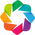

C:\Users\shakt\AppData\Local\Temp\ipykernel_15668\1593454356.py:17: DeprecationWarning:

`groupby` is deprecated. It has been renamed to `group_by`.

C:\Users\shakt\AppData\Local\Temp\ipykernel_15668\1593454356.py:96: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.58' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



Gutschein Filtered DataFrame:
                  Gutschein  Count  Total Wert
0             Pfand + 0,08     97        8.23
1             Pfand + 0,25    184       50.25
2        Pfand zurück 0,08      1        0.24
3  Verzehrgutschein 2 € DB     16       36.00
4        Pfand zurück 0,25      1        0.25
5       Guthabenkarte Text      2       70.00
6     Guthabenkarte Kaffee      4       90.00
7            Mehrwegbecher    122       12.65
8                 Sanifair    291      173.00
Aggregated Data:
        Datum      Gutschein  Total Wert  Total Count
0 2023-01-01   Pfand + 0,08        0.08            1
1 2023-01-01   Pfand + 0,25        3.50           12
2 2023-01-02  Mehrwegbecher        0.40            3
3 2023-01-02   Pfand + 0,08        0.32            4
4 2023-01-02   Pfand + 0,25        3.00           12
Datum Categories: ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09', '2023-01-10', '2023-01-11', 

c:\Users\shakt\anaconda3\Lib\site-packages\holoviews\core\util.py:1175: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.

c:\Users\shakt\anaconda3\Lib\site-packages\holoviews\core\util.py:1175: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.

c:\Users\shakt\anaconda3\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

c:\Users\shakt\anaconda3\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataF

:Chord   [source,target]   (value,count)

In [119]:
import polars as pl
import pandas as pd
import holoviews as hv
from holoviews import dim, opts

hv.extension('bokeh')

# Assuming df2 is already defined as a Polars DataFrame
Gutschein = df2.select([
    'Datum',
    'Artikelname',
    'Menge',
    'Zwischensumme'
]).rename({'Artikelname': 'Gutschein', 'Zwischensumme': 'Total Wert'})

# Count occurrences of Gutschein and sum the total value per Gutschein
gutschein_counts = Gutschein.groupby('Gutschein').agg([
    pl.count('Gutschein').alias('Count'),
    pl.sum('Total Wert').alias('Total Wert')
])

# Filter out rows where Count or Total Wert is 0
gutschein_filtered = gutschein_counts.filter(
    (pl.col('Count') > 0) & (pl.col('Total Wert') > 0)
)

# Convert to Pandas DataFrame for processing
gutschein_filtered_df = gutschein_filtered.to_pandas()

# Display the result
print("Gutschein Filtered DataFrame:\n", gutschein_filtered_df)

# Convert the main Gutschein DataFrame to Pandas for further processing
Gutschein_df = Gutschein.to_pandas()

# Convert 'Datum' to datetime with the correct format
Gutschein_df['Datum'] = pd.to_datetime(Gutschein_df['Datum'], format='%d.%m.%Y')

# Filter out negative values
positive_data = Gutschein_df[Gutschein_df['Total Wert'] > 0]

# Aggregate total value and count per Gutschein and Date
aggregated_data = positive_data.groupby(['Datum', 'Gutschein']).agg({'Total Wert': 'sum', 'Menge': 'count'}).reset_index()
aggregated_data.rename(columns={'Menge': 'Total Count'}, inplace=True)

# Debugging print
print("Aggregated Data:\n", aggregated_data.head())

# Prepare data for Chord plot
datum_categories = aggregated_data['Datum'].dt.strftime('%Y-%m-%d').unique().tolist()
gutschein_categories = aggregated_data['Gutschein'].unique().tolist()
all_categories = datum_categories + gutschein_categories

# Debugging print
print("Datum Categories:", datum_categories)
print("Gutschein Categories:", gutschein_categories)
print("All Categories:", all_categories)

source_indices = []
target_indices = []
values = []
counts = []

for _, row in aggregated_data.iterrows():
    source_index = all_categories.index(row['Datum'].strftime('%Y-%m-%d'))
    target_index = all_categories.index(row['Gutschein'])
    source_indices.append(source_index)
    target_indices.append(target_index)
    values.append(row['Total Wert'])
    counts.append(row['Total Count'])

# Debugging print
print("Source Indices:", source_indices)
print("Target Indices:", target_indices)
print("Values:", values)
print("Counts:", counts)

# Ensure no NaN values in the 'values' list
values = [v if pd.notna(v) else 0 for v in values]

# Reconstruct the links DataFrame to ensure indices are within bounds
links = pd.DataFrame({'source': source_indices, 'target': target_indices, 'value': values, 'count': counts})

# Create nodes DataFrame with Total Wert and Total Count
nodes = pd.DataFrame({'index': range(len(all_categories)), 'Category': all_categories})
nodes['Total Wert'] = 0
nodes['Total Count'] = 0

for i, category in enumerate(all_categories):
    if category in datum_categories:
        total_wert = aggregated_data[aggregated_data['Datum'].dt.strftime('%Y-%m-%d') == category]['Total Wert'].sum()
        total_count = aggregated_data[aggregated_data['Datum'].dt.strftime('%Y-%m-%d') == category]['Total Count'].sum()
    else:
        total_wert = aggregated_data[aggregated_data['Gutschein'] == category]['Total Wert'].sum()
        total_count = aggregated_data[aggregated_data['Gutschein'] == category]['Total Count'].sum()
    nodes.at[i, 'Total Wert'] = total_wert
    nodes.at[i, 'Total Count'] = total_count

# Debugging print
print("Nodes:\n", nodes.head())
print("Links:\n", links.head())

nodes_dataset = hv.Dataset(nodes, 'index', ['Category', 'Total Wert', 'Total Count'])

chord = hv.Chord((links, nodes_dataset)).opts(
    opts.Chord(cmap='Category20', edge_color=dim('source').str(), labels='Category', node_color=dim('index').str(), height=800, width=800, title='Total Wert and Count by Gutschein and Date')
)

hv.output(size=200)
chord


In [9]:
pip install holoviews bokeh pandas


Note: you may need to restart the kernel to use updated packages.


In [124]:
import polars as pl
import pandas as pd
import plotly.graph_objects as go

# Assuming df2 is already defined as a Polars DataFrame
Gutschein = df2.select([
    'Datum',
    'Artikelname',
    'Menge',
    'Zwischensumme'
]).rename({'Artikelname': 'Gutschein', 'Zwischensumme': 'Total Wert'})

# Convert to Pandas DataFrame for processing
Gutschein_df = Gutschein.to_pandas()

# Convert 'Datum' to datetime with the correct format
Gutschein_df['Datum'] = pd.to_datetime(Gutschein_df['Datum'], format='%d.%m.%Y')

# Aggregate total value per Gutschein and Date
aggregated_data = Gutschein_df.groupby(['Datum', 'Gutschein']).agg({'Total Wert': 'sum'}).reset_index()

# Filter out rows where Total Wert is zero
aggregated_data = aggregated_data[aggregated_data['Total Wert'] != 0]

# Find the top 10 highest and lowest days based on total value
top_10_highest_days = aggregated_data.nlargest(10, 'Total Wert')
top_10_lowest_days = aggregated_data.nsmallest(10, 'Total Wert')

# Combine the top 10 highest and lowest into one DataFrame
combined_top_days = pd.concat([top_10_highest_days, top_10_lowest_days])

# Plotting using Plotly bar plot
fig = go.Figure()

# Add bars for each Gutschein on the highest days
for date in top_10_highest_days['Datum'].unique():
    day_data = top_10_highest_days[top_10_highest_days['Datum'] == date]
    fig.add_trace(go.Bar(
        x=day_data['Gutschein'],
        y=day_data['Total Wert'],
        name=f"Highest Day: {date.date()}",
        hovertext=day_data['Datum'].astype(str)
    ))

# Add bars for each Gutschein on the lowest days
for date in top_10_lowest_days['Datum'].unique():
    day_data = top_10_lowest_days[top_10_lowest_days['Datum'] == date]
    fig.add_trace(go.Bar(
        x=day_data['Gutschein'],
        y=day_data['Total Wert'],
        name=f"Lowest Day: {date.date()}",
        hovertext=day_data['Datum'].astype(str)
    ))

# Update the layout for better readability
fig.update_layout(
    barmode='group',
    title='Top 10 Highest and Lowest Gutschein Total Wert by Day',
    xaxis_title='Gutschein',
    yaxis_title='Total Wert',
    legend_title='Days',
    template='plotly_white'
)

fig.show()


In [129]:
#df = pl.read_excel("new-statistic.xlsx")
df3 = pl.read_excel("Arbeit-student-2023.xlsx")
df3


Personalnr.,Mitarbeitername,Anmeldung,Anmeldungstyp,Abmeldung,Abmeldungstyp,Arbeitszeit
i64,str,str,str,str,str,str
1308,"""Heike Schwedt""","""01/01/23 06:52""","""Anmeldung""","""01/01/23 12:00""","""Abmeldung""","""05:08"""
1302,"""Thomas Braun""","""01/01/23 10:08""","""Anmeldung""","""01/01/23 05:08""","""Abmeldung""","""06:59"""
1308,"""Heike Schwedt""","""01/02/23 04:53""","""Anmeldung""","""01/02/23 10:42""","""Pausenstart""","""05:48"""
1303,"""Luisa Lentisco""","""01/02/23 05:56""","""Anmeldung""","""01/02/23 11:13""","""Pausenstart""","""05:17"""
1308,"""Heike Schwedt""","""01/02/23 11:08""","""Pausenende""","""01/02/23 01:23""","""Abmeldung""","""02:15"""
…,…,…,…,…,…,…
1315,"""Azra Luma""","""12/30/23 03:07""","""Anmeldung""","""12/30/23 07:15""","""Abmeldung""","""04:07"""
1307,"""Jessica Büttner""","""12/31/23 05:57""","""Anmeldung""","""12/31/23 01:01""","""Abmeldung""","""07:04"""
1326,"""Nirmala Tamang""","""12/31/23 06:11""","""Anmeldung""","""12/31/23 09:59""","""Abmeldung""","""03:47"""


In [130]:
df3.columns

['Personalnr.',
 'Mitarbeitername',
 'Anmeldung',
 'Anmeldungstyp',
 'Abmeldung',
 'Abmeldungstyp',
 'Arbeitszeit']

In [131]:
personal = df3.select(['Personalnr.',
 'Mitarbeitername',
 'Anmeldung',
 'Anmeldungstyp',
 'Abmeldung',
 'Abmeldungstyp',
 'Arbeitszeit'])
personal

Personalnr.,Mitarbeitername,Anmeldung,Anmeldungstyp,Abmeldung,Abmeldungstyp,Arbeitszeit
i64,str,str,str,str,str,str
1308,"""Heike Schwedt""","""01/01/23 06:52""","""Anmeldung""","""01/01/23 12:00""","""Abmeldung""","""05:08"""
1302,"""Thomas Braun""","""01/01/23 10:08""","""Anmeldung""","""01/01/23 05:08""","""Abmeldung""","""06:59"""
1308,"""Heike Schwedt""","""01/02/23 04:53""","""Anmeldung""","""01/02/23 10:42""","""Pausenstart""","""05:48"""
1303,"""Luisa Lentisco""","""01/02/23 05:56""","""Anmeldung""","""01/02/23 11:13""","""Pausenstart""","""05:17"""
1308,"""Heike Schwedt""","""01/02/23 11:08""","""Pausenende""","""01/02/23 01:23""","""Abmeldung""","""02:15"""
…,…,…,…,…,…,…
1315,"""Azra Luma""","""12/30/23 03:07""","""Anmeldung""","""12/30/23 07:15""","""Abmeldung""","""04:07"""
1307,"""Jessica Büttner""","""12/31/23 05:57""","""Anmeldung""","""12/31/23 01:01""","""Abmeldung""","""07:04"""
1326,"""Nirmala Tamang""","""12/31/23 06:11""","""Anmeldung""","""12/31/23 09:59""","""Abmeldung""","""03:47"""


In [162]:
import polars as pl
import pandas as pd
import plotly.express as px

# Assuming df3 is already defined as a Polars DataFrame
personal = df3.select([
    'Mitarbeitername',
    'Arbeitszeit'
])

# Convert to Pandas DataFrame for further processing
personal_df = personal.to_pandas()

# Debugging print
print("Initial DataFrame:\n", personal_df)

# Convert 'Arbeitszeit' to total seconds
def convert_to_seconds(time_str):
    try:
        h, m = map(int, time_str.split(':'))
        return h * 3600 + m * 60
    except Exception:
        return 0

personal_df['Arbeitszeit'] = personal_df['Arbeitszeit'].apply(convert_to_seconds)

# Debugging print
print("DataFrame after converting Arbeitszeit to seconds:\n", personal_df)

# Aggregate total Arbeitszeit per Mitarbeitername
aggregated_data = personal_df.groupby('Mitarbeitername').agg({'Arbeitszeit': 'sum'}).reset_index()

# Convert total seconds to hours for display
def seconds_to_hours(seconds):
    return seconds / 3600

aggregated_data['Arbeitszeit'] = aggregated_data['Arbeitszeit'].apply(seconds_to_hours)

# Sort the data in descending order
aggregated_data = aggregated_data.sort_values(by='Arbeitszeit', ascending=False)

# Debugging print
print("Aggregated Data with Arbeitszeit in hours (sorted):\n", aggregated_data)

# Plot the aggregated data to check correctness
fig = px.bar(
    aggregated_data, 
    x='Mitarbeitername', 
    y='Arbeitszeit', 
    title='Total Arbeitszeit by Mitarbeitername (in hours)',
    color='Arbeitszeit',
    color_continuous_scale=px.colors.sequential.Viridis
)
fig.update_layout(xaxis_title='Mitarbeitername', yaxis_title='Arbeitszeit (hours)', barmode='group')
fig.show()


Initial DataFrame:
       Mitarbeitername Arbeitszeit
0       Heike Schwedt       05:08
1        Thomas Braun       06:59
2       Heike Schwedt       05:48
3      Luisa Lentisco       05:17
4       Heike Schwedt       02:15
...               ...         ...
1483        Azra Luma       04:07
1484  Jessica Büttner       07:04
1485   Nirmala Tamang       03:47
1486   Rupa Lamichane       07:02
1487        Azra Luma       08:48

[1488 rows x 2 columns]
DataFrame after converting Arbeitszeit to seconds:
       Mitarbeitername  Arbeitszeit
0       Heike Schwedt        18480
1        Thomas Braun        25140
2       Heike Schwedt        20880
3      Luisa Lentisco        19020
4       Heike Schwedt         8100
...               ...          ...
1483        Azra Luma        14820
1484  Jessica Büttner        25440
1485   Nirmala Tamang        13620
1486   Rupa Lamichane        25320
1487        Azra Luma        31680

[1488 rows x 2 columns]
Aggregated Data with Arbeitszeit in hours (sorted)

C:\Users\shakt\AppData\Local\Temp\ipykernel_15668\583789766.py:55: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\shakt\AppData\Local\Temp\ipykernel_15668\583789766.py:56: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



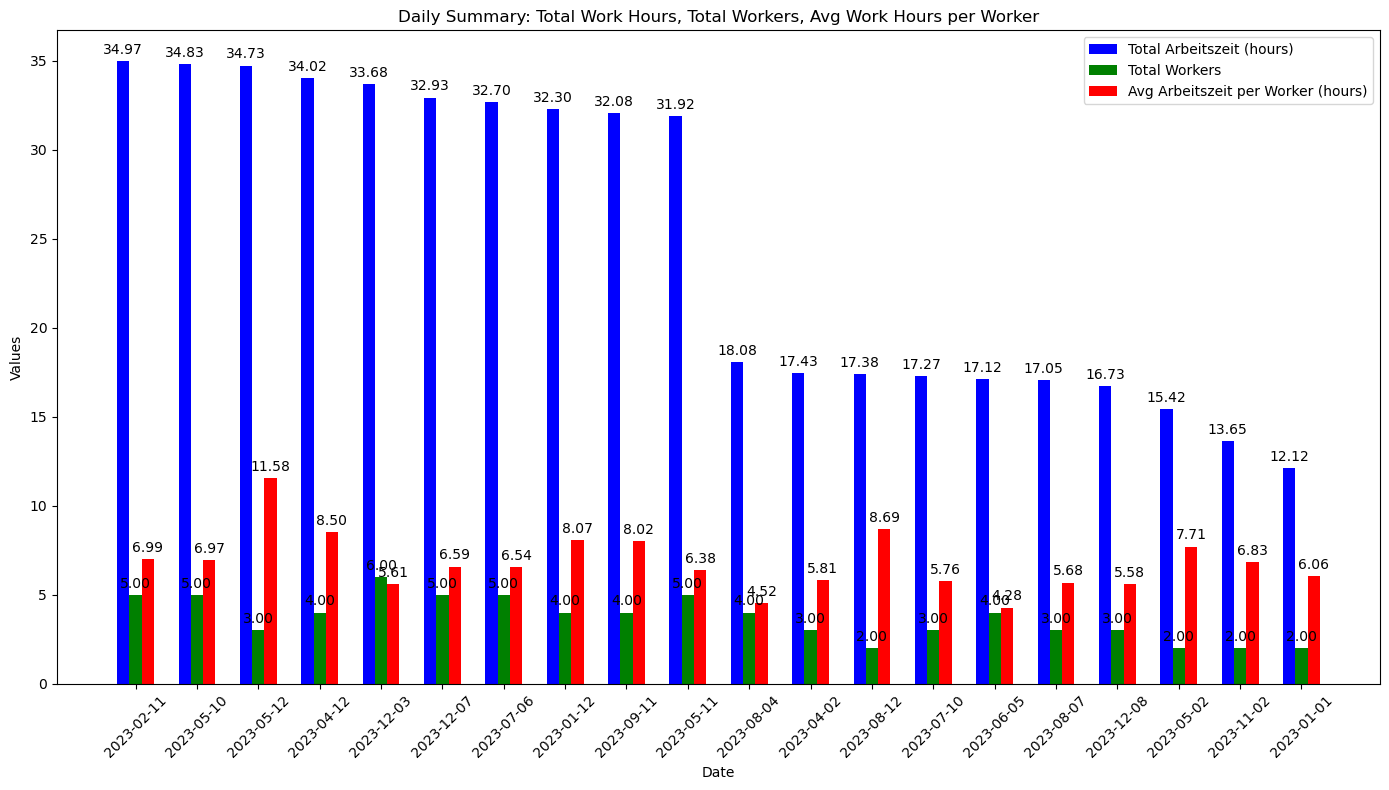

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df3 is already defined as a Polars DataFrame
personal = df3.select([
    'Mitarbeitername',
    'Anmeldung',
    'Arbeitszeit'
])

# Convert to Pandas DataFrame for further processing
personal_df = personal.to_pandas()

# Convert 'Anmeldung' to datetime
personal_df['Anmeldung'] = pd.to_datetime(personal_df['Anmeldung'], format='%d/%m/%y %H:%M', errors='coerce')

# Extract the date part from 'Anmeldung'
personal_df['Datum'] = personal_df['Anmeldung'].dt.date

# Convert 'Arbeitszeit' to total seconds
def convert_to_seconds(time_str):
    try:
        h, m = map(int, time_str.split(':'))
        return h * 3600 + m * 60
    except Exception:
        return 0

personal_df['Arbeitszeit'] = personal_df['Arbeitszeit'].apply(convert_to_seconds)

# Aggregate total Arbeitszeit per Mitarbeitername and date
aggregated_data = personal_df.groupby(['Datum', 'Mitarbeitername']).agg({'Arbeitszeit': 'sum'}).reset_index()

# Calculate total work hours and total workers per day
daily_summary = aggregated_data.groupby('Datum').agg(
    Total_Arbeitszeit=('Arbeitszeit', 'sum'),
    Total_Workers=('Mitarbeitername', 'nunique')
).reset_index()

# Calculate average work hours per worker
daily_summary['Avg_Arbeitszeit_per_Worker'] = daily_summary['Total_Arbeitszeit'] / daily_summary['Total_Workers']

# Convert total seconds to hours for display
daily_summary['Total_Arbeitszeit'] = daily_summary['Total_Arbeitszeit'] / 3600
daily_summary['Avg_Arbeitszeit_per_Worker'] = daily_summary['Avg_Arbeitszeit_per_Worker'] / 3600

# Sort the data in descending order by total work hours
daily_summary = daily_summary.sort_values(by='Total_Arbeitszeit', ascending=False)

# Select top 10 and bottom 10 days
top_10_days = daily_summary.head(10)
bottom_10_days = daily_summary.tail(10)

# Combine top 10 and bottom 10 with a label
top_10_days['Category'] = 'Top 10'
bottom_10_days['Category'] = 'Bottom 10'
combined_days = pd.concat([top_10_days, bottom_10_days])

# Create a bar plot with grouped bars
fig, ax = plt.subplots(figsize=(14, 8))

bar_width = 0.2
index = np.arange(len(combined_days))

# Bar plots
bar1 = ax.bar(index, combined_days['Total_Arbeitszeit'], bar_width, label='Total Arbeitszeit (hours)', color='blue')
bar2 = ax.bar(index + bar_width, combined_days['Total_Workers'], bar_width, label='Total Workers', color='green')
bar3 = ax.bar(index + 2 * bar_width, combined_days['Avg_Arbeitszeit_per_Worker'], bar_width, label='Avg Arbeitszeit per Worker (hours)', color='red')

# Add labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Values')
ax.set_title('Daily Summary: Total Work Hours, Total Workers, Avg Work Hours per Worker')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(combined_days['Datum'], rotation=45)

# Add legend
ax.legend()

# Add data labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords='offset points',
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)

plt.tight_layout()
plt.show()


In [212]:
statist= pl.read_excel("new-statistic.xlsx")
statist

Datum,Uhrzeit,Aufnahme Zeitpunkt,Menge,Artikelname,VK-Preis,Summe ArtikelOrig,Bonsumme,MwSt,Bar,EC-Karte,In-Haus,Mitarbeitername
str,str,str,f64,str,f64,f64,f64,f64,f64,f64,bool,str
"""01.01.2023""","""08:45:07""","""08:45:03""",1.0,"""Großer Filterkaffee""",2.5,2.5,2.5,0.19,3.0,0.0,false,"""Heike Schwedt"""
"""01.01.2023""","""08:46:25""","""08:46:02""",1.0,"""BIG Cappuccino Kokosreis""",4.6,4.6,4.6,0.19,10.0,0.0,false,"""Heike Schwedt"""
"""01.01.2023""","""08:50:40""","""08:50:23""",2.0,"""Vegan Caesar Wrap""",3.9,7.8,7.8,0.07,0.0,7.8,false,"""Heike Schwedt"""
"""01.01.2023""","""09:04:36""","""09:04:32""",1.0,"""Doppelter Espresso""",2.5,2.5,2.5,0.19,20.0,0.0,false,"""Heike Schwedt"""
"""01.01.2023""","""09:10:57""","""09:10:38""",1.0,"""Cappuccino Hafer""",3.6,3.6,7.9,0.19,0.0,7.9,false,"""Heike Schwedt"""
…,…,…,…,…,…,…,…,…,…,…,…,…
"""31.12.2023""","""18:35:53""","""18:35:41""",1.0,"""Holy Granola Kater""",4.9,4.9,4.9,0.07,0.0,4.9,false,"""Azra Luma"""
"""31.12.2023""","""18:51:55""","""18:51:32""",1.0,"""Grilled Veggie Stulle""",4.2,4.2,4.2,0.07,0.0,4.2,false,"""Azra Luma"""
"""31.12.2023""","""18:53:55""","""18:53:43""",1.0,"""Vegan Caesar Wrap""",4.2,4.2,4.2,0.07,0.0,4.2,false,"""Azra Luma"""


In [22]:
#statist = statist.join(personal, on='Mitarbeitername', how='inner')


In [295]:
statist

Datum,Uhrzeit,Aufnahme Zeitpunkt,Menge,Artikelname,VK-Preis,Summe ArtikelOrig,Bonsumme,MwSt,Bar,EC-Karte,In-Haus,Mitarbeitername
str,str,str,f64,str,f64,f64,f64,f64,f64,f64,bool,str
"""01.01.2023""","""08:45:07""","""08:45:03""",1.0,"""Großer Filterkaffee""",2.5,2.5,2.5,0.19,3.0,0.0,false,"""Heike Schwedt"""
"""01.01.2023""","""08:46:25""","""08:46:02""",1.0,"""BIG Cappuccino Kokosreis""",4.6,4.6,4.6,0.19,10.0,0.0,false,"""Heike Schwedt"""
"""01.01.2023""","""08:50:40""","""08:50:23""",2.0,"""Vegan Caesar Wrap""",3.9,7.8,7.8,0.07,0.0,7.8,false,"""Heike Schwedt"""
"""01.01.2023""","""09:04:36""","""09:04:32""",1.0,"""Doppelter Espresso""",2.5,2.5,2.5,0.19,20.0,0.0,false,"""Heike Schwedt"""
"""01.01.2023""","""09:10:57""","""09:10:38""",1.0,"""Cappuccino Hafer""",3.6,3.6,7.9,0.19,0.0,7.9,false,"""Heike Schwedt"""
…,…,…,…,…,…,…,…,…,…,…,…,…
"""31.12.2023""","""18:35:53""","""18:35:41""",1.0,"""Holy Granola Kater""",4.9,4.9,4.9,0.07,0.0,4.9,false,"""Azra Luma"""
"""31.12.2023""","""18:51:55""","""18:51:32""",1.0,"""Grilled Veggie Stulle""",4.2,4.2,4.2,0.07,0.0,4.2,false,"""Azra Luma"""
"""31.12.2023""","""18:53:55""","""18:53:43""",1.0,"""Vegan Caesar Wrap""",4.2,4.2,4.2,0.07,0.0,4.2,false,"""Azra Luma"""


In [296]:
sales = statist.join(Daybook, on='Datum', how='inner')


In [297]:
sales

Datum,Uhrzeit,Aufnahme Zeitpunkt,Menge,Artikelname,VK-Preis,Summe ArtikelOrig,Bonsumme,MwSt,Bar,EC-Karte,In-Haus,Mitarbeitername,Umsatz,Anzahl Kunden,Storno Wert,Kassen Differenz
str,str,str,f64,str,f64,f64,f64,f64,f64,f64,bool,str,f64,i64,f64,f64
"""01.01.2023""","""08:45:07""","""08:45:03""",1.0,"""Großer Filterkaffee""",2.5,2.5,2.5,0.19,3.0,0.0,false,"""Heike Schwedt""",809.4,122,null,0.6
"""01.01.2023""","""08:46:25""","""08:46:02""",1.0,"""BIG Cappuccino Kokosreis""",4.6,4.6,4.6,0.19,10.0,0.0,false,"""Heike Schwedt""",809.4,122,null,0.6
"""01.01.2023""","""08:50:40""","""08:50:23""",2.0,"""Vegan Caesar Wrap""",3.9,7.8,7.8,0.07,0.0,7.8,false,"""Heike Schwedt""",809.4,122,null,0.6
"""01.01.2023""","""09:04:36""","""09:04:32""",1.0,"""Doppelter Espresso""",2.5,2.5,2.5,0.19,20.0,0.0,false,"""Heike Schwedt""",809.4,122,null,0.6
"""01.01.2023""","""09:10:57""","""09:10:38""",1.0,"""Cappuccino Hafer""",3.6,3.6,7.9,0.19,0.0,7.9,false,"""Heike Schwedt""",809.4,122,null,0.6
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""31.12.2023""","""18:35:53""","""18:35:41""",1.0,"""Holy Granola Kater""",4.9,4.9,4.9,0.07,0.0,4.9,false,"""Azra Luma""",1412.96,205,null,-1.24
"""31.12.2023""","""18:51:55""","""18:51:32""",1.0,"""Grilled Veggie Stulle""",4.2,4.2,4.2,0.07,0.0,4.2,false,"""Azra Luma""",1412.96,205,null,-1.24
"""31.12.2023""","""18:53:55""","""18:53:43""",1.0,"""Vegan Caesar Wrap""",4.2,4.2,4.2,0.07,0.0,4.2,false,"""Azra Luma""",1412.96,205,null,-1.24


In [298]:
print(sales.head(2))
print(sales.tail(2))
print(sales.sample(2))

shape: (2, 17)
┌────────────┬──────────┬───────────┬───────┬───┬────────┬────────┬─────────────┬───────────┐
│ Datum      ┆ Uhrzeit  ┆ Aufnahme  ┆ Menge ┆ … ┆ Umsatz ┆ Anzahl ┆ Storno Wert ┆ Kassen    │
│ ---        ┆ ---      ┆ Zeitpunkt ┆ ---   ┆   ┆ ---    ┆ Kunden ┆ ---         ┆ Differenz │
│ str        ┆ str      ┆ ---       ┆ f64   ┆   ┆ f64    ┆ ---    ┆ f64         ┆ ---       │
│            ┆          ┆ str       ┆       ┆   ┆        ┆ i64    ┆             ┆ f64       │
╞════════════╪══════════╪═══════════╪═══════╪═══╪════════╪════════╪═════════════╪═══════════╡
│ 01.01.2023 ┆ 08:45:07 ┆ 08:45:03  ┆ 1.0   ┆ … ┆ 809.4  ┆ 122    ┆ null        ┆ 0.6       │
│ 01.01.2023 ┆ 08:46:25 ┆ 08:46:02  ┆ 1.0   ┆ … ┆ 809.4  ┆ 122    ┆ null        ┆ 0.6       │
└────────────┴──────────┴───────────┴───────┴───┴────────┴────────┴─────────────┴───────────┘
shape: (2, 17)
┌────────────┬──────────┬──────────────┬───────┬───┬─────────┬────────┬──────────────┬─────────────┐
│ Datum      ┆ Uhrzeit 

In [299]:
import polars.selectors as cs

# Polars feature selectiom
numeric_data_sales = sales.select(cs.numeric())
categorical_data_sales = sales.select(cs.string())


In [300]:
sales.select(pl.all().is_null().sum())

Datum,Uhrzeit,Aufnahme Zeitpunkt,Menge,Artikelname,VK-Preis,Summe ArtikelOrig,Bonsumme,MwSt,Bar,EC-Karte,In-Haus,Mitarbeitername,Umsatz,Anzahl Kunden,Storno Wert,Kassen Differenz
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136919,0


In [301]:
sales = sales.with_columns(
    pl.col("Storno Wert").fill_null(pl.lit(0)),
)
print(sales)

shape: (141_566, 17)
┌────────────┬──────────┬──────────────┬───────┬───┬─────────┬────────┬──────────────┬─────────────┐
│ Datum      ┆ Uhrzeit  ┆ Aufnahme     ┆ Menge ┆ … ┆ Umsatz  ┆ Anzahl ┆ Storno Wert  ┆ Kassen      │
│ ---        ┆ ---      ┆ Zeitpunkt    ┆ ---   ┆   ┆ ---     ┆ Kunden ┆ ---          ┆ Differenz   │
│ str        ┆ str      ┆ ---          ┆ f64   ┆   ┆ f64     ┆ ---    ┆ f64          ┆ ---         │
│            ┆          ┆ str          ┆       ┆   ┆         ┆ i64    ┆              ┆ f64         │
╞════════════╪══════════╪══════════════╪═══════╪═══╪═════════╪════════╪══════════════╪═════════════╡
│ 01.01.2023 ┆ 08:45:07 ┆ 08:45:03     ┆ 1.0   ┆ … ┆ 809.4   ┆ 122    ┆ 0.0          ┆ 0.6         │
│ 01.01.2023 ┆ 08:46:25 ┆ 08:46:02     ┆ 1.0   ┆ … ┆ 809.4   ┆ 122    ┆ 0.0          ┆ 0.6         │
│ 01.01.2023 ┆ 08:50:40 ┆ 08:50:23     ┆ 2.0   ┆ … ┆ 809.4   ┆ 122    ┆ 0.0          ┆ 0.6         │
│ 01.01.2023 ┆ 09:04:36 ┆ 09:04:32     ┆ 1.0   ┆ … ┆ 809.4   ┆ 122    

In [302]:
sales.columns

['Datum',
 'Uhrzeit',
 'Aufnahme Zeitpunkt',
 'Menge',
 'Artikelname',
 'VK-Preis',
 'Summe ArtikelOrig',
 'Bonsumme',
 'MwSt',
 'Bar',
 'EC-Karte',
 'In-Haus',
 'Mitarbeitername',
 'Umsatz',
 'Anzahl Kunden',
 'Storno Wert',
 'Kassen Differenz']

In [303]:
sales = sales['Datum','Aufnahme Zeitpunkt','Menge','Artikelname','VK-Preis','Bar',
              'EC-Karte','In-Haus','Mitarbeitername','Umsatz','Anzahl Kunden','Storno Wert','Kassen Differenz']
sales

Datum,Aufnahme Zeitpunkt,Menge,Artikelname,VK-Preis,Bar,EC-Karte,In-Haus,Mitarbeitername,Umsatz,Anzahl Kunden,Storno Wert,Kassen Differenz
str,str,f64,str,f64,f64,f64,bool,str,f64,i64,f64,f64
"""01.01.2023""","""08:45:03""",1.0,"""Großer Filterkaffee""",2.5,3.0,0.0,false,"""Heike Schwedt""",809.4,122,0.0,0.6
"""01.01.2023""","""08:46:02""",1.0,"""BIG Cappuccino Kokosreis""",4.6,10.0,0.0,false,"""Heike Schwedt""",809.4,122,0.0,0.6
"""01.01.2023""","""08:50:23""",2.0,"""Vegan Caesar Wrap""",3.9,0.0,7.8,false,"""Heike Schwedt""",809.4,122,0.0,0.6
"""01.01.2023""","""09:04:32""",1.0,"""Doppelter Espresso""",2.5,20.0,0.0,false,"""Heike Schwedt""",809.4,122,0.0,0.6
"""01.01.2023""","""09:10:38""",1.0,"""Cappuccino Hafer""",3.6,0.0,7.9,false,"""Heike Schwedt""",809.4,122,0.0,0.6
…,…,…,…,…,…,…,…,…,…,…,…,…
"""31.12.2023""","""18:35:41""",1.0,"""Holy Granola Kater""",4.9,0.0,4.9,false,"""Azra Luma""",1412.96,205,0.0,-1.24
"""31.12.2023""","""18:51:32""",1.0,"""Grilled Veggie Stulle""",4.2,0.0,4.2,false,"""Azra Luma""",1412.96,205,0.0,-1.24
"""31.12.2023""","""18:53:43""",1.0,"""Vegan Caesar Wrap""",4.2,0.0,4.2,false,"""Azra Luma""",1412.96,205,0.0,-1.24


In [304]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsforecast import StatsForecast
from pmdarima import auto_arima
from statsforecast.models import AutoARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from mlforecast import MLForecast
from mlforecast.target_transforms import Differences
from numba import njit
from window_ops.expanding import expanding_mean
from window_ops.rolling import rolling_mean
import lightgbm as lgb
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [287]:
sales.columns

['Datum',
 'Aufnahme Zeitpunkt',
 'Menge',
 'Artikelname',
 'VK-Preis',
 'Bar',
 'EC-Karte',
 'In-Haus',
 'Mitarbeitername',
 'Umsatz',
 'Anzahl Kunden',
 'Storno Wert',
 'Kassen Differenz']

In [305]:
def inverse_stationarity(data, first_value):
    p_i=data.copy()
    p_i=np.insert(p_i,0,first_value) # insert fist value
    p_i=np.cumsum(p_i)
    p_i=np.delete(p_i,0) # remove the first value after calculating cummulative
    p_i=np.exp(p_i) # if you use log 10 then use np.power(10, p_i)
    return p_i


def MAPE(y_actual, y_pred): 
    return np.mean(np.abs((y_actual - y_pred) / y_actual))


In [290]:
# Initialize columns of dataframe
cols = ["InvoiceNo", "StockCode", "Description", "Quantity", "InvoiceDate", "UnitPrice","CustomerID", "Country"]
keep_cols = ["InvoiceDate", "Quantity", "UnitPrice"]

# read data file
df = (
    pd.read_excel("data/OnlineRetail.xlsx", skiprows=0, header=0, names=cols)
    .drop(columns=[col for col in cols if col not in keep_cols]) # Only keep column keep_cols list
)

df=df.loc[df['InvoiceDate']<'12-01-2011'] # remove last month data

       Month       Umsatz
0 2023-01-31  10468505.48
1 2023-02-28  15068729.07
2 2023-03-31  18018110.30
3 2023-04-30  13389525.27
4 2023-05-31  14537539.70


C:\Users\shakt\AppData\Local\Temp\ipykernel_15668\1666503847.py:21: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [322]:
# New data sales with specified columns
sales = sales['Datum','Aufnahme Zeitpunkt','Menge','Artikelname','VK-Preis','Bar',
              'EC-Karte','In-Haus','Mitarbeitername','Umsatz','Anzahl Kunden','Storno Wert','Kassen Differenz']
sales_keep_cols = sales['Datum', 'Menge', 'VK-Preis']


sales_keep_cols

Datum,Menge,VK-Preis
str,f64,f64
"""01.01.2023""",1.0,2.5
"""01.01.2023""",1.0,4.6
"""01.01.2023""",2.0,3.9
"""01.01.2023""",1.0,2.5
"""01.01.2023""",1.0,3.6
…,…,…
"""31.12.2023""",1.0,4.9
"""31.12.2023""",1.0,4.2
"""31.12.2023""",1.0,4.2


In [323]:
# Perform the calculation directly in Polars
sales_keep_cols = sales_keep_cols.with_columns(
    (pl.col("Menge") * pl.col("VK-Preis")).alias("TotalPrice")
)

# If you need to convert to pandas
sales_keep_cols_pd = sales_keep_cols.to_pandas()

# Display the result
print(sales_keep_cols_pd)

             Datum  Menge  VK-Preis  TotalPrice
0       01.01.2023    1.0       2.5         2.5
1       01.01.2023    1.0       4.6         4.6
2       01.01.2023    2.0       3.9         7.8
3       01.01.2023    1.0       2.5         2.5
4       01.01.2023    1.0       3.6         3.6
...            ...    ...       ...         ...
141561  31.12.2023    1.0       4.9         4.9
141562  31.12.2023    1.0       4.2         4.2
141563  31.12.2023    1.0       4.2         4.2
141564  31.12.2023    1.0       1.9         1.9
141565  31.12.2023    1.0       4.2         4.2

[141566 rows x 4 columns]


In [336]:
pip install prophet


  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/24/2b/834e9a347f2f0161e32a3c6125b8a1ebdf6ac33199a0ed3a0bdf1f0c296f/prophet-1.1.5-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/5d/12/6522f3de83ca690aa52f4b8c88a1e203abb1e2d75c31669dc004949143cd/cmdstanpy-1.2.4-py3-none-any.whl.metadata
  Obtaining dependency information for holidays>=0.25 from https://files.pythonhosted.org/packages/59/8c/13b22e8c697591d5eeb36edc46408fb1d8ff1233f36739a9d06a2bfaad64/holidays-0.51-py3-none-any.whl.metadata
  Obtaining dependency information for importlib-resources from https://files.pythonhosted.org/packages/75/06/4df55e1b7b112d183f65db9503bff189e97179b256e1ea450a3c365241e0/importlib_resources-6.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for stanio<2.0.0,>=0.4.0 from https://files.pythonhosted.org/packages/55/35/076a5ff427a47613581f6bd7acebfa8d49046a1b78132

In [342]:
# Select the relevant columns for analysis
sales_keep_cols = sales.select(['Datum', 'Menge', 'VK-Preis'])

# Calculate TotalPrice
sales_keep_cols = sales_keep_cols.with_columns(
    (pl.col('Menge') * pl.col('VK-Preis')).alias('TotalPrice')
)

# Convert 'Datum' column to datetime and group by date, summing TotalPrice and Menge
daily_cost = sales_keep_cols.with_columns(
    pl.col('Datum').str.strptime(pl.Date, format='%d.%m.%Y').alias('Datum')
).groupby('Datum').agg([
    pl.sum('TotalPrice').alias('TotalPrice'),
    pl.sum('Menge').alias('Total Menge')
]).sort('Datum')

# Convert Polars DataFrame to pandas for further processing
daily_cost_pd = daily_cost.to_pandas()

# Print the prepared DataFrame
print("Prepared DataFrame:")
print(daily_cost_pd)

Prepared DataFrame:
         Datum  TotalPrice  Total Menge
0   2023-01-01      809.40        245.0
1   2023-01-02     1005.70        288.0
2   2023-01-03      924.90        270.0
3   2023-01-04     1171.72        305.0
4   2023-01-05     1020.56        281.0
..         ...         ...          ...
360 2023-12-27     1125.70        289.0
361 2023-12-28     1117.52        311.0
362 2023-12-29     1402.28        371.0
363 2023-12-30     1175.96        310.0
364 2023-12-31     1412.96        387.0

[365 rows x 3 columns]


C:\Users\shakt\AppData\Local\Temp\ipykernel_15668\2449331337.py:12: DeprecationWarning:

`groupby` is deprecated. It has been renamed to `group_by`.



In [403]:
# Select the relevant columns for analysis
sales_keep_cols = sales.select(['Datum', 'Menge', 'VK-Preis'])

# Calculate TotalPrice
sales_keep_cols = sales_keep_cols.with_columns(
    (pl.col('Menge') * pl.col('VK-Preis')).alias('TotalPrice')
)

# Convert 'Datum' column to datetime and group by date, summing TotalPrice and Menge
daily_cost = sales_keep_cols.with_columns(
    pl.col('Datum').str.strptime(pl.Date, format='%d.%m.%Y').alias('Datum')
).groupby('Datum').agg([
    pl.sum('TotalPrice').alias('TotalPrice'),
    pl.sum('Menge').alias('Total Menge')
]).sort('Datum')

# Convert Polars DataFrame to pandas for further processing
daily_cost_pd = daily_cost.to_pandas()

# Log transformation and differencing
daily_cost_pd['log_tp'] = np.log(daily_cost_pd['TotalPrice'])
daily_cost_pd['log_tp_diff'] = daily_cost_pd['log_tp'].diff()
first_ref_log_tp = daily_cost_pd['log_tp'].iloc[0]
daily_cost_pd['log_tp_diff_lag_2'] = daily_cost_pd['log_tp_diff'].shift(2)
daily_cost_pd['log_tp_diff_lag_1'] = daily_cost_pd['log_tp_diff'].shift(1)

# Drop NaN values
daily_cost_pd = daily_cost_pd.dropna()

# Print the prepared DataFrame
print("Prepared DataFrame:")
daily_cost_pd

Prepared DataFrame:


C:\Users\shakt\AppData\Local\Temp\ipykernel_15668\2942495352.py:12: DeprecationWarning:

`groupby` is deprecated. It has been renamed to `group_by`.



,Datum,TotalPrice,Total Menge,log_tp,log_tp_diff,log_tp_diff_lag_2,log_tp_diff_lag_1
3,2023-01-04,1171.72,305.0,7.066228,0.236542,0.217146,-0.083753
4,2023-01-05,1020.56,281.0,6.928107,-0.138121,-0.083753,0.236542
5,2023-01-06,1100.91,300.0,7.003892,0.075786,0.236542,-0.138121
6,2023-01-07,1055.70,285.0,6.961959,-0.041933,-0.138121,0.075786
7,2023-01-08,1165.03,327.0,7.060502,0.098543,0.075786,-0.041933
...,...,...,...,...,...,...,...
360,2023-12-27,1125.70,289.0,7.026160,0.341799,-0.391825,0.190063
361,2023-12-28,1117.52,311.0,7.018867,-0.007293,0.190063,0.341799
362,2023-12-29,1402.28,371.0,7.245855,0.226988,0.341799,-0.007293
363,2023-12-30,1175.96,310.0,7.069840,-0.176015,-0.007293,0.226988


<Axes: xlabel='Datum', ylabel='TotalPrice'>

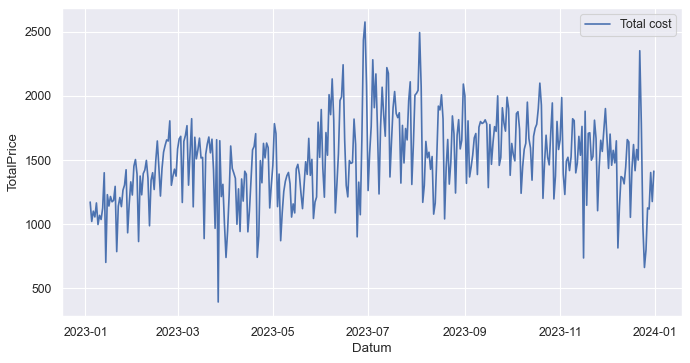

In [384]:
plt.figure(figsize=(10, 5), dpi=80)
sns.lineplot(x='Datum', y='TotalPrice', data=daily_cost_pd, label='Total cost')

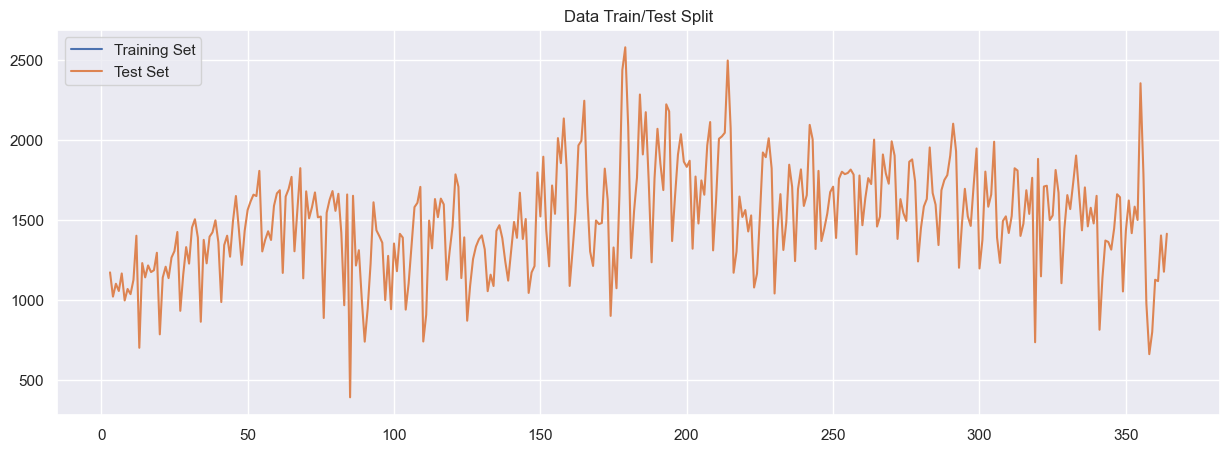

In [434]:
# Train/test split
train = daily_cost_pd[daily_cost_pd.Datum < '2011-11-01'] # 11 months
test = daily_cost_pd[daily_cost_pd.Datum >= '2011-11-01'] # 1 month

# Drop missing values in the training set
train = train.dropna()

# Plotting
fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, y='TotalPrice', label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, y='TotalPrice', label='Test Set')
ax.legend(['Training Set', 'Test Set'])
plt.show()


In [393]:
daily_cost_pd.columns

Index(['Datum', 'TotalPrice', 'Total Menge', 'log_tp', 'log_tp_diff',
       'log_tp_diff_lag_2', 'log_tp_diff_lag_1'],
      dtype='object')

In [411]:
# Check for NaN values in the relevant columns
print(daily_cost_pd[['log_tp_diff_lag_2', 'log_tp_diff_lag_1', 'log_tp_diff']].isna().sum())

# Display the first few rows to confirm the columns are not empty
print(daily_cost_pd[['log_tp_diff_lag_2', 'log_tp_diff_lag_1', 'log_tp_diff']].head())


log_tp_diff_lag_2    0
log_tp_diff_lag_1    0
log_tp_diff          0
dtype: int64
   log_tp_diff_lag_2  log_tp_diff_lag_1  log_tp_diff
3           0.217146          -0.083753     0.236542
4          -0.083753           0.236542    -0.138121
5           0.236542          -0.138121     0.075786
6          -0.138121           0.075786    -0.041933
7           0.075786          -0.041933     0.098543


In [412]:
# Example split (assuming train and test are already defined)
# Otherwise, you can split the data manually like below:
from sklearn.model_selection import train_test_split

train, test = train_test_split(daily_cost_pd, test_size=0.2, random_state=42)

# Extract features and target for training and testing
features = ['log_tp_diff_lag_2', 'log_tp_diff_lag_1']
target = ['log_tp_diff']

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

# Verify the shapes to confirm data is not empty
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# Check if any of the columns in X_train or X_test are empty
print(X_train.isna().sum())
print(X_test.isna().sum())


(289, 2) (289, 1)
(73, 2) (73, 1)
log_tp_diff_lag_2    0
log_tp_diff_lag_1    0
dtype: int64
log_tp_diff_lag_2    0
log_tp_diff_lag_1    0
dtype: int64


In [436]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=2000,
                       early_stopping_rounds=50,
                       objective='reg:squarederror',
                       max_depth=3,
                       learning_rate=0.01,
                       colsample_bytree=1,
                       subsample=0.7)
 
reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=100)

[0]	validation_0-rmse:0.55172	validation_1-rmse:0.58339
[100]	validation_0-rmse:0.28272	validation_1-rmse:0.33397
[200]	validation_0-rmse:0.21212	validation_1-rmse:0.28190
[300]	validation_0-rmse:0.19256	validation_1-rmse:0.27325
[358]	validation_0-rmse:0.18681	validation_1-rmse:0.27351


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=2000,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [443]:
print(f"Length of the entire dataset: {len(daily_cost_pd)}")
print(daily_cost_pd.head())



Length of the entire dataset: 362
       Datum  TotalPrice  Total Menge    log_tp  log_tp_diff  \
3 2023-01-04     1171.72        305.0  7.066228     0.236542   
4 2023-01-05     1020.56        281.0  6.928107    -0.138121   
5 2023-01-06     1100.91        300.0  7.003892     0.075786   
6 2023-01-07     1055.70        285.0  6.961959    -0.041933   
7 2023-01-08     1165.03        327.0  7.060502     0.098543   

   log_tp_diff_lag_2  log_tp_diff_lag_1  
3           0.217146          -0.083753  
4          -0.083753           0.236542  
5           0.236542          -0.138121  
6          -0.138121           0.075786  
7           0.075786          -0.041933  


In [444]:
from sklearn.model_selection import train_test_split

# Split the data ensuring that both train and test sets are not empty
train, test = train_test_split(daily_cost_pd, test_size=0.2, random_state=42)

print(f"Length of train DataFrame after split: {len(train)}")
print(f"Length of test DataFrame after split: {len(test)}")


Length of train DataFrame after split: 289
Length of test DataFrame after split: 73


In [446]:
# Define the inverse_stationarity function
def inverse_stationarity(diff_series, last_observed_value):
    original_series = np.r_[last_observed_value, diff_series].cumsum()
    return original_series[1:]

# Split the data ensuring that both train and test sets are not empty
train, test = train_test_split(daily_cost_pd, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=100)

# Train the model
X_train = train[['log_tp_diff_lag_2', 'log_tp_diff_lag_1']]
y_train = train[['log_tp_diff']]

X_test = test[['log_tp_diff_lag_2', 'log_tp_diff_lag_1']]
y_test = test[['log_tp_diff']]

xg_reg.fit(X_train, y_train)

# Predict on the test set
y_xgbpredict = xg_reg.predict(X_test)

# Take the inverse of the predicted differenced values
last_log_tp_value = train['log_tp'].iloc[-1]
y_xgbpredict_inverse = inverse_stationarity(y_xgbpredict, last_log_tp_value)

# Evaluate the algorithm
mae = mean_absolute_error(test['TotalPrice'], y_xgbpredict_inverse)
mse = mean_squared_error(test['TotalPrice'], y_xgbpredict_inverse)
rmse = np.sqrt(mse)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

Mean Absolute Error: 1468.2279457029606
Mean Squared Error: 2271062.2913308465
Root Mean Squared Error: 1507.0044098577969


In [459]:
print('Accumulated difference to last month Total sales: ', np.sum(test.TotalPrice-y_xgbpredict_inverse))

Accumulated difference to last month Total sales:  107180.64003631612


In [448]:
print(reg.feature_importances_)

[0.2717297  0.72827035]


In [453]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Define the inverse_stationarity function
def inverse_stationarity(diff_series, last_observed_value):
    original_series = np.r_[last_observed_value, diff_series].cumsum()
    return original_series[1:]

# Split the data ensuring that both train and test sets are not empty
train, test = train_test_split(daily_cost_pd, test_size=0.2, random_state=42)

# Train the model
X_train = train[['log_tp_diff_lag_2', 'log_tp_diff_lag_1']]
y_train = train[['log_tp_diff']]

X_test = test[['log_tp_diff_lag_2', 'log_tp_diff_lag_1']]
y_test = test[['log_tp_diff']]

regrf = RandomForestRegressor(n_estimators=2000, random_state=10, criterion='absolute_error',
                              min_samples_leaf=3, max_depth=3)
regrf.fit(X_train, y_train.values.ravel())

# Predict on the test set
y_rfpredict = regrf.predict(X_test)

# Take the inverse of the predicted differenced values
last_log_tp_value = train['log_tp'].iloc[-1]
y_rfpredict_inverse = inverse_stationarity(y_rfpredict, last_log_tp_value)

# Evaluate the algorithm
mae = mean_absolute_error(test['TotalPrice'], y_rfpredict_inverse)
mse = mean_squared_error(test['TotalPrice'], y_rfpredict_inverse)
rmse = np.sqrt(mse)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)



Mean Absolute Error: 1467.1266110015524
Mean Squared Error: 2267917.672256472
Root Mean Squared Error: 1505.9607140481694


In [457]:
print('Accumulated difference to last month Total sales: ', np.sum(test.TotalPrice-y_rfpredict_inverse))

Accumulated difference to last month Total sales:  107100.24260311332


In [461]:
pip install prophet


In [475]:
print(f"Training data for Prophet:\n{train_prophet.head()}")


Training data for Prophet:
            ds        y
212 2023-08-01  2020.50
340 2023-12-07  1649.63
359 2023-12-26   799.80
78  2023-03-20  1624.52
87  2023-03-29  1214.72


In [476]:
future = model.make_future_dataframe(periods=len(test_prophet))
print(f"Future DataFrame:\n{future.tail()}")



Future DataFrame:
            ds
357 2024-03-09
358 2024-03-10
359 2024-03-11
360 2024-03-12
361 2024-03-13


In [479]:
print(f"Test data for Prophet:\n{test_prophet.head()}")




Test data for Prophet:
            ds        y
166 2023-06-16  1655.63
36  2023-02-06  1228.32
18  2023-01-19  1185.24
325 2023-11-22  1527.58
60  2023-03-02  1664.92


In [480]:
forecast_test = forecast[['ds', 'yhat']].iloc[-len(test_prophet):].reset_index(drop=True)
print(f"Forecast for test period:\n{forecast_test.head()}")
results = pd.merge(test_prophet, forecast_test, on='ds')
print(f"Results after merging:\n{results.head()}")



Forecast for test period:
          ds         yhat
0 2024-01-01  1487.430212
1 2024-01-02  1538.424078
2 2024-01-03  1545.518512
3 2024-01-04  1663.724836
4 2024-01-05  1596.230987
Results after merging:
Empty DataFrame
Columns: [ds, y, yhat]
Index: []


In [487]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

# Assuming daily_cost_pd is your DataFrame
# Split the data into train and test sets
# For simplicity, let's take the first 80% as training and the remaining 20% as testing
train_size = int(len(daily_cost_pd) * 0.8)
train = daily_cost_pd.iloc[:train_size]
test = daily_cost_pd.iloc[train_size:]

# Prepare the data for Prophet
# Prophet expects columns 'ds' for date and 'y' for the value to forecast
train_prophet = train[['Datum', 'TotalPrice']].rename(columns={'Datum': 'ds', 'TotalPrice': 'y'})
test_prophet = test[['Datum', 'TotalPrice']].rename(columns={'Datum': 'ds', 'TotalPrice': 'y'})

# Check the Training Data
print(f"Training data for Prophet:\n{train_prophet.head()}")
print(f"Training data range: {train_prophet['ds'].min()} to {train_prophet['ds'].max()}")

# Initialize and train the Prophet model
model = Prophet()
model.fit(train_prophet)

# Ensure future DataFrame covers the test period dates
last_train_date = train_prophet['ds'].max()
first_test_date = test_prophet['ds'].min()
last_test_date = test_prophet['ds'].max()

# Calculate the number of additional days needed for the forecast
n_test_periods = (last_test_date - last_train_date).days + 1

# Make future dataframe for the test period
future = model.make_future_dataframe(periods=n_test_periods)
print(f"Future DataFrame:\n{future.tail()}")
print(f"Future data range: {future['ds'].min()} to {future['ds'].max()}")

# Make predictions
forecast = model.predict(future)
print(f"Forecast:\n{forecast[['ds', 'yhat']].tail()}")
print(f"Forecast data range: {forecast['ds'].min()} to {forecast['ds'].max()}")

# Check the Test Data
print(f"Test data for Prophet:\n{test_prophet.head()}")
print(f"Test data range: {test_prophet['ds'].min()} to {test_prophet['ds'].max()}")

# Ensure that test dates are within the range of forecast dates
forecast_test = forecast[['ds', 'yhat']].iloc[-len(test_prophet):].reset_index(drop=True)
print(f"Forecast for test period:\n{forecast_test.head()}")
print(f"Forecast test range: {forecast_test['ds'].min()} to {forecast_test['ds'].max()}")

# Debug: Print date ranges to ensure overlap
print(f"Test data range: {test_prophet['ds'].min()} to {test_prophet['ds'].max()}")
print(f"Forecast data range: {forecast_test['ds'].min()} to {forecast_test['ds'].max()}")

# Merge the forecast with the test set to evaluate
results = pd.merge(test_prophet, forecast_test, on='ds', how='inner')
print(f"Results after merging:\n{results.head()}")

# Rename columns for clarity
results = results.rename(columns={'y': 'Actual', 'yhat': 'Predicted'})

# Check the Results DataFrame
print(f"Results DataFrame:\n{results.head()}")

# Evaluate the algorithm
mae = mean_absolute_error(results['Actual'], results['Predicted'])
mse = mean_squared_error(results['Actual'], results['Predicted'])
rmse = np.sqrt(mse)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)


21:28:38 - cmdstanpy - INFO - Chain [1] start processing
21:28:38 - cmdstanpy - INFO - Chain [1] done processing


Training data for Prophet:
          ds        y
3 2023-01-04  1171.72
4 2023-01-05  1020.56
5 2023-01-06  1100.91
6 2023-01-07  1055.70
7 2023-01-08  1165.03
Training data range: 2023-01-04 00:00:00 to 2023-10-19 00:00:00
Future DataFrame:
            ds
358 2023-12-28
359 2023-12-29
360 2023-12-30
361 2023-12-31
362 2024-01-01
Future data range: 2023-01-04 00:00:00 to 2024-01-01 00:00:00
Forecast:
            ds         yhat
358 2023-12-28  1988.763740
359 2023-12-29  1885.900035
360 2023-12-30  1400.627741
361 2023-12-31  1716.512226
362 2024-01-01  1741.514775
Forecast data range: 2023-01-04 00:00:00 to 2024-01-01 00:00:00
Test data for Prophet:
            ds        y
292 2023-10-20  1927.39
293 2023-10-21  1200.60
294 2023-10-22  1474.26
295 2023-10-23  1693.49
296 2023-10-24  1521.82
Test data range: 2023-10-20 00:00:00 to 2023-12-31 00:00:00
Forecast for test period:
          ds         yhat
0 2023-10-21  1337.895658
1 2023-10-22  1653.780143
2 2023-10-23  1678.782693
3 2023-1

In [490]:
accumulated_difference = np.sum(results['Actual'].values - results['Predicted'].values)
print('Accumulated difference to last month Total sales: ', accumulated_difference)

Accumulated difference to last month Total sales:  -19119.180246421907


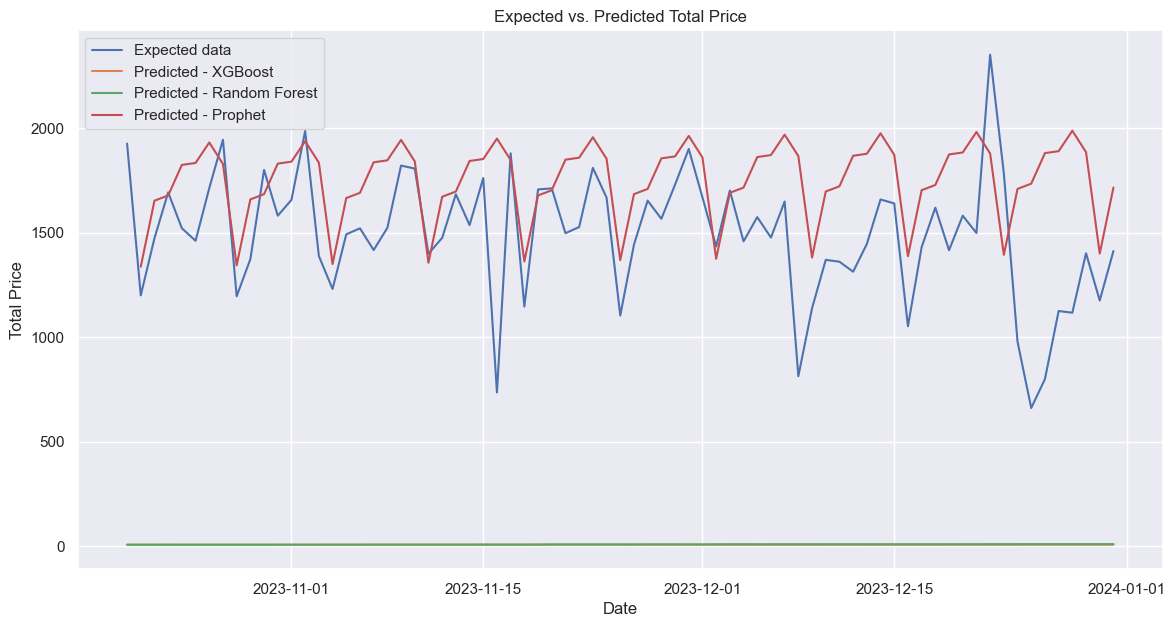

In [492]:

# Plot expected vs. predicted
plt.figure(figsize=(14, 7))

# Ensure lengths match for plotting
test_dates = test['Datum'].reset_index(drop=True)

plt.plot(test_dates, test['TotalPrice'], label='Expected data')
plt.plot(test_dates, y_xgbpredict_inverse, label='Predicted - XGBoost')
plt.plot(test_dates, y_rfpredict_inverse, label='Predicted - Random Forest')
plt.plot(results['ds'], results['Predicted'], label='Predicted - Prophet')

plt.xlabel('Date')
plt.ylabel('Total Price')
plt.title('Expected vs. Predicted Total Price')
plt.legend()
plt.grid(True)
plt.show()

21:36:09 - cmdstanpy - INFO - Chain [1] start processing
21:36:09 - cmdstanpy - INFO - Chain [1] done processing


XGBoost - MAE: 178.91924315774943, MSE: 59521.611258699784, RMSE: 243.9705130926682
Random Forest - MAE: 106.60163785211338, MSE: 22115.66170652823, RMSE: 148.71335416339795


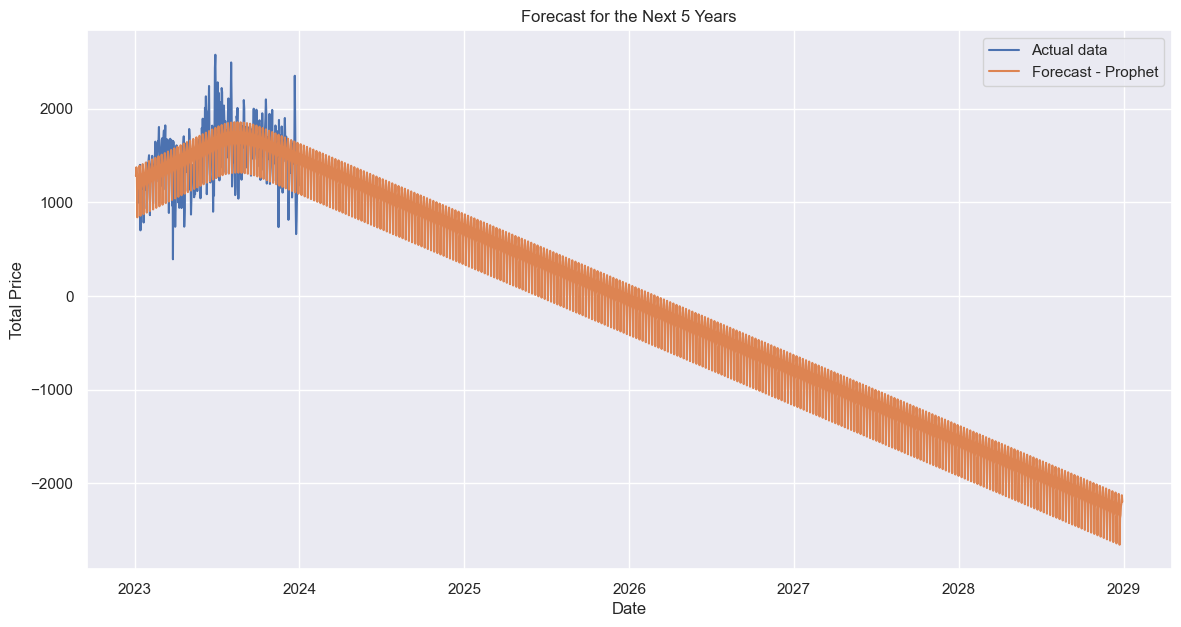

In [493]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
from prophet import Prophet
import matplotlib.pyplot as plt

# Assuming daily_cost_pd is your DataFrame
# Prepare the data for Prophet
data = daily_cost_pd[['Datum', 'TotalPrice']].rename(columns={'Datum': 'ds', 'TotalPrice': 'y'})

# Train Prophet model on the entire dataset
model_prophet = Prophet()
model_prophet.fit(data)

# Make future dataframe for 5 years (5*365 days)
future_prophet = model_prophet.make_future_dataframe(periods=5*365)
forecast_prophet = model_prophet.predict(future_prophet)

# Prepare data for XGBoost and Random Forest
data['ds'] = pd.to_datetime(data['ds'])
data = data.set_index('ds')
data['log_tp_diff'] = data['y'].diff()
data['log_tp_diff_lag_1'] = data['log_tp_diff'].shift(1)
data['log_tp_diff_lag_2'] = data['log_tp_diff'].shift(2)
data = data.dropna()

features = ['log_tp_diff_lag_2', 'log_tp_diff_lag_1']
target = 'log_tp_diff'

X = data[features]
y = data[target]

# Train XGBoost model on the entire dataset
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=100)
xg_reg.fit(X, y)

# Train Random Forest model on the entire dataset
rf_reg = RandomForestRegressor(n_estimators=2000, random_state=10, criterion='absolute_error',
                               min_samples_leaf=3, max_depth=3)
rf_reg.fit(X, y)

# Prepare for evaluation
test_size = int(len(data) * 0.2)
train_data = data.iloc[:-test_size]
test_data = data.iloc[-test_size:]

X_train = train_data[features]
y_train = train_data[target]

X_test = test_data[features]
y_test = test_data[target]

# Predict with XGBoost
y_xgbpredict = xg_reg.predict(X_test)
y_xgbpredict_inverse = y_test.values + y_xgbpredict

# Predict with Random Forest
y_rfpredict = rf_reg.predict(X_test)
y_rfpredict_inverse = y_test.values + y_rfpredict

# Evaluate models
mae_xgb = mean_absolute_error(y_test, y_xgbpredict_inverse)
mse_xgb = mean_squared_error(y_test, y_xgbpredict_inverse)
rmse_xgb = np.sqrt(mse_xgb)

mae_rf = mean_absolute_error(y_test, y_rfpredict_inverse)
mse_rf = mean_squared_error(y_test, y_rfpredict_inverse)
rmse_rf = np.sqrt(mse_rf)

print(f"XGBoost - MAE: {mae_xgb}, MSE: {mse_xgb}, RMSE: {rmse_xgb}")
print(f"Random Forest - MAE: {mae_rf}, MSE: {mse_rf}, RMSE: {rmse_rf}")

# Assuming Prophet performed better based on evaluation
# Forecast for the next 5 years using Prophet

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['y'], label='Actual data')
plt.plot(forecast_prophet['ds'], forecast_prophet['yhat'], label='Forecast - Prophet')
plt.xlabel('Date')
plt.ylabel('Total Price')
plt.title('Forecast for the Next 5 Years')
plt.legend()
plt.grid(True)
plt.show()


21:57:52 - cmdstanpy - INFO - Chain [1] start processing
21:57:52 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\shakt\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

c:\Users\shakt\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

c:\Users\shakt\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

c:\Users\shakt\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

c:\Users\shakt\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

c:\Users\shakt\anaconda3\Li

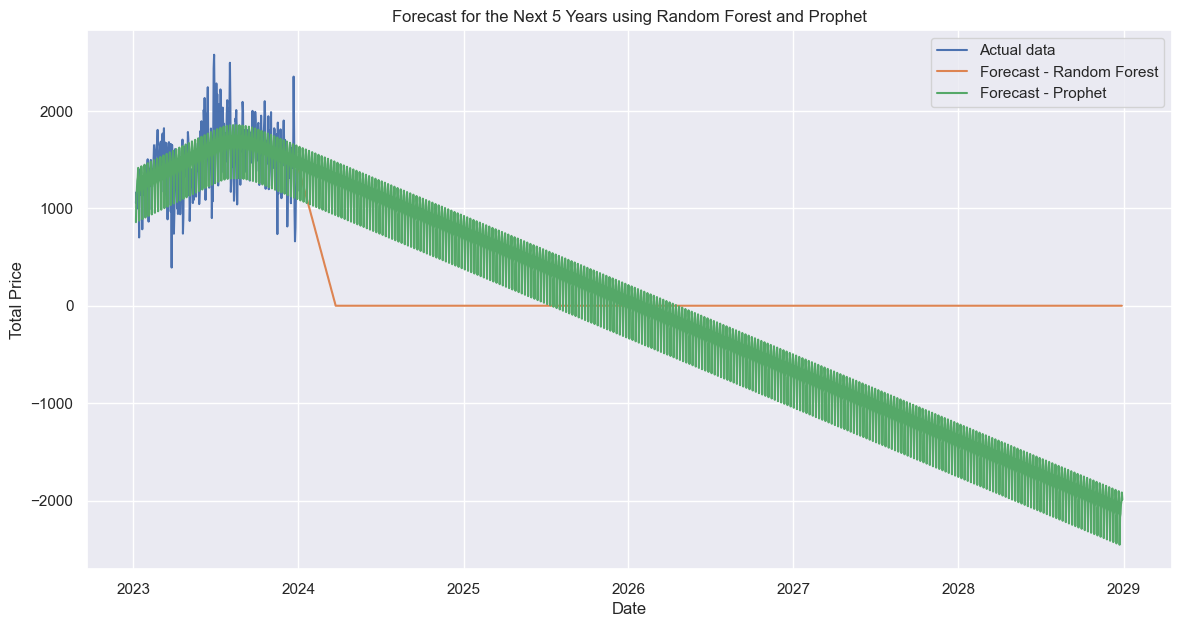

In [499]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from prophet import Prophet

# Prepare data
data = daily_cost_pd[['Datum', 'TotalPrice']].rename(columns={'Datum': 'ds', 'TotalPrice': 'y'})

# Convert date column to datetime and set as index
data['ds'] = pd.to_datetime(data['ds'])
data = data.set_index('ds')
data['log_tp_diff'] = data['y'].diff()
data['log_tp_diff_lag_1'] = data['log_tp_diff'].shift(1)
data['log_tp_diff_lag_2'] = data['log_tp_diff'].shift(2)
data = data.dropna()

features = ['log_tp_diff_lag_2', 'log_tp_diff_lag_1']
target = 'log_tp_diff'

X = data[features]
y = data[target]

# Train Random Forest model on the entire dataset
rf_reg = RandomForestRegressor(n_estimators=2000, random_state=10, criterion='absolute_error',
                               min_samples_leaf=3, max_depth=3)
rf_reg.fit(X, y)

# Train Prophet model on the entire dataset
data_prophet = data.reset_index().rename(columns={'ds': 'Datum', 'y': 'TotalPrice'})
model_prophet = Prophet()
model_prophet.fit(data_prophet[['Datum', 'TotalPrice']].rename(columns={'Datum': 'ds', 'TotalPrice': 'y'}))

# Forecast for the next 5 years
future_dates = pd.date_range(start=data.index[-1], periods=5*365, freq='D')

# Create a DataFrame to hold future dates and features
future_df = pd.DataFrame(index=future_dates)
future_df['log_tp_diff_lag_1'] = np.nan
future_df['log_tp_diff_lag_2'] = np.nan

# Initialize the first lag values with the last values from the original data
future_df.iloc[0, 0] = data['log_tp_diff'].iloc[-1]
future_df.iloc[0, 1] = data['log_tp_diff_lag_1'].iloc[-1]

# Predict future values using Random Forest
rf_predictions = []

for i in range(1, len(future_df)):
    features_values = future_df.iloc[i-1][features].values.reshape(1, -1)
    
    # Random Forest prediction
    rf_pred = rf_reg.predict(features_values)[0]
    rf_predictions.append(rf_pred)
    
    future_df.iloc[i, 0] = rf_pred
    future_df.iloc[i, 1] = future_df.iloc[i-1, 0]

# Inverse the differencing to get the actual predicted values
rf_predictions_cumsum = np.cumsum(rf_predictions) + data['y'].iloc[-1]
rf_predictions_cumsum = np.maximum(rf_predictions_cumsum, 0)  # Ensure non-negative values

# Forecast using Prophet
future_prophet = model_prophet.make_future_dataframe(periods=5*365)
forecast_prophet = model_prophet.predict(future_prophet)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['y'], label='Actual data')
plt.plot(future_df.index[1:], rf_predictions_cumsum, label='Forecast - Random Forest')
plt.plot(forecast_prophet['ds'], forecast_prophet['yhat'], label='Forecast - Prophet')
plt.xlabel('Date')
plt.ylabel('Total Price')
plt.title('Forecast for the Next 5 Years using Random Forest and Prophet')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
max_sales_info

Datum,Uhrzeit,Summe Ausgaben,Kartenzahlung,Bar,Entnahme Differenz,Kassen Differenz,Mitarbeitername,Umsatz,Umsatz zu MwSt 0% (DE ),Umsatz zu MwSt 7% (DE ),Umsatz zu MwSt 19% (DE ),Anzahl Kunden,Erster Verkauf,Letzter Verkauf,Storno Wert,Kassen Differenz_right,Gutschein,Menge,Total Wert,Uhrzeit_right,Aufnahme Zeitpunkt,Menge_right,Artikelname,VK-Preis,Summe ArtikelOrig,Bonsumme,MwSt,Bar_right,EC-Karte,In-Haus,Mitarbeitername_right,Personalnr.,Anmeldung,Arbeitszeit
str,str,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,i64,str,str,f64,f64,str,f64,f64,str,str,f64,str,f64,f64,f64,f64,f64,f64,bool,str,i64,str,str
"""29.06.2023""","""29.06.2023""",91.0,1739.27,2479.27,-6.54,742.71,"""Thomas Braun""",2576.81,-0.5,1792.62,784.69,409,"""06:04:53""","""19:32:46""",0.0,-6.54,"""+ Erdbeerpüree""",1.0,0.0,"""06:04:53""","""06:03:47""",1.0,"""Cappuccino Hafer""",3.6,3.6,3.6,0.19,4.0,0.0,false,"""Sophia Tichy""",1313,"""03/11/23 01:57""","""06:11"""
"""29.06.2023""","""29.06.2023""",91.0,1739.27,2479.27,-6.54,742.71,"""Thomas Braun""",2576.81,-0.5,1792.62,784.69,409,"""06:04:53""","""19:32:46""",0.0,-6.54,"""Sanifair""",-1.0,-0.5,"""06:04:53""","""06:03:47""",1.0,"""Cappuccino Hafer""",3.6,3.6,3.6,0.19,4.0,0.0,false,"""Sophia Tichy""",1313,"""03/11/23 01:57""","""06:11"""
"""29.06.2023""","""29.06.2023""",91.0,1739.27,2479.27,-6.54,742.71,"""Thomas Braun""",2576.81,-0.5,1792.62,784.69,409,"""06:04:53""","""19:32:46""",0.0,-6.54,"""+ Erdbeerpüree""",1.0,0.0,"""06:04:53""","""06:03:47""",1.0,"""Cappuccino Hafer""",3.6,3.6,3.6,0.19,4.0,0.0,false,"""Sophia Tichy""",1313,"""03/12/23 01:56""","""06:07"""
"""29.06.2023""","""29.06.2023""",91.0,1739.27,2479.27,-6.54,742.71,"""Thomas Braun""",2576.81,-0.5,1792.62,784.69,409,"""06:04:53""","""19:32:46""",0.0,-6.54,"""Sanifair""",-1.0,-0.5,"""06:04:53""","""06:03:47""",1.0,"""Cappuccino Hafer""",3.6,3.6,3.6,0.19,4.0,0.0,false,"""Sophia Tichy""",1313,"""03/12/23 01:56""","""06:07"""
"""29.06.2023""","""29.06.2023""",91.0,1739.27,2479.27,-6.54,742.71,"""Thomas Braun""",2576.81,-0.5,1792.62,784.69,409,"""06:04:53""","""19:32:46""",0.0,-6.54,"""+ Erdbeerpüree""",1.0,0.0,"""06:04:53""","""06:03:47""",1.0,"""Cappuccino Hafer""",3.6,3.6,3.6,0.19,4.0,0.0,false,"""Sophia Tichy""",1313,"""03/13/23 03:58""","""03:56"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""29.06.2023""","""29.06.2023""",91.0,1739.27,2479.27,-6.54,742.71,"""Thomas Braun""",2576.81,-0.5,1792.62,784.69,409,"""06:04:53""","""19:32:46""",0.0,-6.54,"""Sanifair""",-1.0,-0.5,"""19:32:46""","""19:32:39""",1.0,"""Fruchtkater klein""",4.7,4.7,4.7,0.07,0.0,4.7,false,"""Azra Luma""",1315,"""12/24/23 09:54""","""05:39"""
"""29.06.2023""","""29.06.2023""",91.0,1739.27,2479.27,-6.54,742.71,"""Thomas Braun""",2576.81,-0.5,1792.62,784.69,409,"""06:04:53""","""19:32:46""",0.0,-6.54,"""+ Erdbeerpüree""",1.0,0.0,"""19:32:46""","""19:32:39""",1.0,"""Fruchtkater klein""",4.7,4.7,4.7,0.07,0.0,4.7,false,"""Azra Luma""",1315,"""12/30/23 03:07""","""04:07"""
"""29.06.2023""","""29.06.2023""",91.0,1739.27,2479.27,-6.54,742.71,"""Thomas Braun""",2576.81,-0.5,1792.62,784.69,409,"""06:04:53""","""19:32:46""",0.0,-6.54,"""Sanifair""",-1.0,-0.5,"""19:32:46""","""19:32:39""",1.0,"""Fruchtkater klein""",4.7,4.7,4.7,0.07,0.0,4.7,false,"""Azra Luma""",1315,"""12/30/23 03:07""","""04:07"""


In [ ]:
#tep-by-Step Code
#Summarize Daily Sales: Aggregate the sales data to calculate daily totals.
#Find Top 10 Highest and Lowest Selling Days: Sort the daily totals to find the top 10 highest and lowest selling days.
#Output Complete Information: Print the complete information for the top 10 highest and lowest selling days.

In [ ]:
# Summarize daily sales
daily_sales = sales.groupby("Datum").agg(
    pl.sum("Umsatz").alias("Total Umsatz")
)

# Find the top 10 highest and lowest selling days
top_10_highest_days = daily_sales.sort("Total Umsatz", descending=True).head(10)
top_10_lowest_days = daily_sales.sort("Total Umsatz", ascending=True).head(10)

# Get complete information for the top 10 highest and lowest selling days
highest_selling_days_info = sales.filter(pl.col("Datum").is_in(top_10_highest_days["Datum"]))
lowest_selling_days_info = sales.filter(pl.col("Datum").is_in(top_10_lowest_days["Datum"]))

print("\nTop 10 Highest Selling Days Information:")
print(highest_selling_days_info)

print("\nTop 10 Lowest Selling Days Information:")
print(lowest_selling_days_info)

In [ ]:

# Step 1: Finding the minimum value in the 'Umsatz' column
min_sales_value = sales['Umsatz'].min()

# Step 2: Additional information
print(f"\nThe minimum sales value (Umsatz) is: {min_sales_value}")

# Step 3: Define columns to include
included_columns = [
    'Datum', 'Entnahme Differenz',
    'Kassen Differenz', 'Umsatz', 'Umsatz zu MwSt 0% (DE )',
    'Umsatz zu MwSt 7% (DE )', 'Umsatz zu MwSt 19% (DE )',
    'Anzahl Kunden', 'Kassen Differenz_right', 'Gutschein',
    'Menge', 'Total', 'U', 'Menge_right', 'Artikelname',
    'Bar_right', 'EC-Karte', 'In-Haus', 'Mitarbeitername_right',
    '.Arbeitszeit(sum)'
]

# Ensure all columns in `included_columns` are in `sales.columns`
included_columns = [col for col in included_columns if col in sales.columns]

# Step 4: Filter rows where 'Umsatz' equals min_sales_value and select included columns
min_sales_info = sales.filter(pl.col('Umsatz') == min_sales_value).select([pl.col(c) for c in included_columns])

# Step 5: Remove duplicate rows (if any)
min_sales_info_unique = min_sales_info.unique()

# Step 6: Print details of the day(s) with minimum sales (including all columns)
print("\nDetails of the day(s) with minimum sales (including all columns):")
print(min_sales_info_unique)

# Plotting the details
# Convert to pandas DataFrame for ease of plotting with matplotlib
min_sales_info_df = min_sales_info_unique.to_pandas()

# Plotting the details of the day(s) with minimum sales
fig, ax = plt.subplots(figsize=(10, 6))
min_sales_info_df.plot(kind='bar', ax=ax)
ax.set_title('Details of the Day(s) with Minimum Sales')
ax.set_xlabel('Index')
ax.set_ylabel('Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
